In [1]:
#pip install -r requirements.txt

import hrvanalysis
import astropy
import future
import nolds
import numpy
import scipy
import actipy
import matplotlib

In [2]:
import json

# Load the JSON file part 1
with open(r'C:\Users\Dominik\Documents\PPKE ITK\Sport Lab\Recordings\24H_firstpart\20240207T055432Z_234530000246_heartRate_stream.json', 'r') as file:
    uploaded = json.load(file)

# Load the JSON file part 2
with open(r'C:\Users\Dominik\Documents\PPKE ITK\Sport Lab\Recordings\24H_secondpart\20240207T182428Z_234530000246_heartRate_stream.json', 'r') as file:
    uploaded2 = json.load(file)

In [3]:
import numpy as np

#Get the first part of the recording

hr_data1 = uploaded
# Extract average and rrData from the JSON data
averages = np.array([entry['heartRate']['average'] for entry in hr_data1['data']])
rr_data_1 = np.array([entry['heartRate']['rrData'][0] for entry in hr_data1['data']])
#rr_val_24_HR_1 = rr_data
# Turn the numbers into float
rr_list_1=[float(i) for i in rr_data_1] # make them float type
#print(rr_list_1)
print(len(rr_list_1))

60695


In [4]:
# Get the second part of the recording
hr_data2 = uploaded2
rr_data_2 = np.array([entry['heartRate']['rrData'][0] for entry in hr_data2['data']])
display(rr_data_2)
rr_list_2=[float(i) for i in rr_data_2]
print(len(rr_list_2))

array([840, 816, 816, ..., 776, 800, 832])

46784


In [5]:
# Concatenate RR data
raw_rr_data_combined = np.concatenate((rr_list_1, rr_list_2))
display(raw_rr_data_combined)
print(raw_rr_data_combined.shape)
print(len(raw_rr_data_combined))


array([704., 720., 696., ..., 776., 800., 832.])

(107479,)
107479


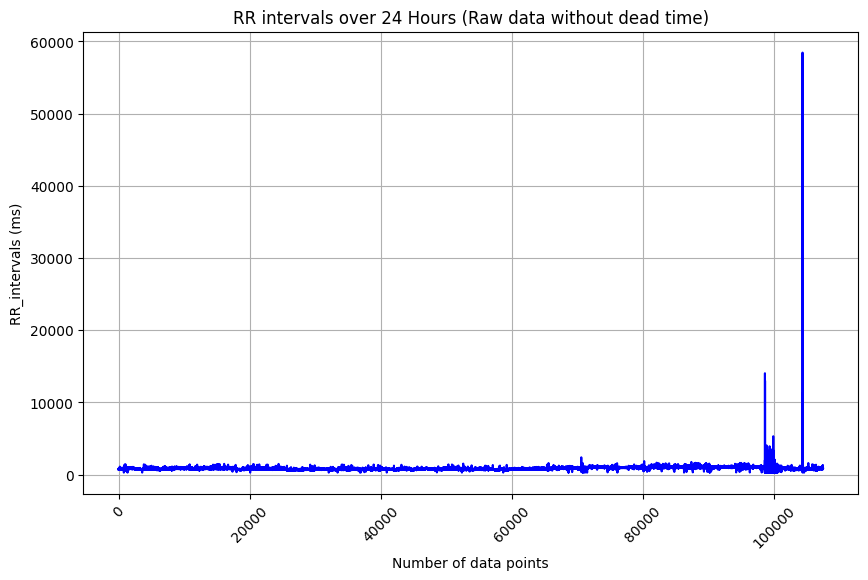

In [6]:
import matplotlib.pyplot as plt

# Plot heart rate with timestamps
plt.figure(figsize=(10, 6))
plt.plot(raw_rr_data_combined, color='blue', label='Raw RR data')
plt.title('RR intervals over 24 Hours (Raw data without dead time)')
plt.xlabel('Number of data points')
plt.ylabel('RR_intervals (ms)')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [7]:
# Assuming rr_data_combined is your list of RR intervals
outliers = [value for value in raw_rr_data_combined if value > 2000]
print(outliers)


[2384.0, 14032.0, 3056.0, 13000.0, 2784.0, 2144.0, 3400.0, 2144.0, 3088.0, 3288.0, 3368.0, 2480.0, 2792.0, 2720.0, 2488.0, 2064.0, 2392.0, 2248.0, 2080.0, 2928.0, 2416.0, 2160.0, 2864.0, 2016.0, 2864.0, 2536.0, 2600.0, 2392.0, 2072.0, 2096.0, 2832.0, 2464.0, 2896.0, 2264.0, 2256.0, 2304.0, 2688.0, 2488.0, 2936.0, 3376.0, 2240.0, 2528.0, 2096.0, 2936.0, 2264.0, 2448.0, 2456.0, 2528.0, 2400.0, 2416.0, 2136.0, 2328.0, 2744.0, 2160.0, 2176.0, 4032.0, 2512.0, 3120.0, 2472.0, 2760.0, 2920.0, 2352.0, 2184.0, 3464.0, 2504.0, 2304.0, 2608.0, 2616.0, 2120.0, 2168.0, 2024.0, 2768.0, 2312.0, 2504.0, 2512.0, 2656.0, 3360.0, 3232.0, 2656.0, 2376.0, 2224.0, 2408.0, 2120.0, 2128.0, 2312.0, 2456.0, 2688.0, 2664.0, 2104.0, 2192.0, 2200.0, 2312.0, 2040.0, 2488.0, 2160.0, 2168.0, 2752.0, 2144.0, 2072.0, 2064.0, 2016.0, 2184.0, 2200.0, 2376.0, 2440.0, 3912.0, 3432.0, 2296.0, 2216.0, 2560.0, 2336.0, 2992.0, 2136.0, 2120.0, 2040.0, 3464.0, 2272.0, 2648.0, 2176.0, 3728.0, 5304.0, 4576.0, 2008.0, 2224.0, 3312.

In [8]:
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values, get_time_domain_features

# This remove outliers from signal
rr_intervals_without_outliers = remove_outliers(rr_intervals=raw_rr_data_combined,low_rri=300, high_rri=2000)
# This replaces outliers nan values with linear interpolation
interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers,interpolation_method="linear")
# This remove ectopic beats from signal
nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
# This replaces ectopic beats nan values with linear interpolation
interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)
rr_data_cleaned = interpolated_nn_intervals

345 outlier(s) have been deleted.
The outlier(s) value(s) are : [264.0, 264.0, 264.0, 264.0, 264.0, 264.0, 272.0, 280.0, 272.0, 288.0, 264.0, 288.0, 264.0, 280.0, 264.0, 272.0, 2384.0, 288.0, 288.0, 272.0, 264.0, 264.0, 296.0, 264.0, 264.0, 264.0, 264.0, 296.0, 264.0, 280.0, 288.0, 280.0, 280.0, 280.0, 14032.0, 264.0, 3056.0, 13000.0, 2784.0, 2144.0, 272.0, 3400.0, 2144.0, 3088.0, 3288.0, 3368.0, 2480.0, 2792.0, 2720.0, 264.0, 272.0, 2488.0, 2064.0, 288.0, 2392.0, 2248.0, 2080.0, 2928.0, 264.0, 264.0, 2416.0, 264.0, 2160.0, 2864.0, 264.0, 2016.0, 2864.0, 2536.0, 2600.0, 2392.0, 296.0, 2072.0, 264.0, 296.0, 2096.0, 2832.0, 2464.0, 2896.0, 2264.0, 2256.0, 2304.0, 2688.0, 2488.0, 2936.0, 288.0, 3376.0, 2240.0, 2528.0, 288.0, 2096.0, 264.0, 272.0, 2936.0, 264.0, 2264.0, 2448.0, 2456.0, 2528.0, 2400.0, 2416.0, 2136.0, 264.0, 2328.0, 2744.0, 264.0, 288.0, 2160.0, 2176.0, 4032.0, 2512.0, 3120.0, 2472.0, 2760.0, 2920.0, 2352.0, 2184.0, 3464.0, 2504.0, 264.0, 272.0, 272.0, 2304.0, 2608.0, 2616.

In [9]:
# rr_val_24_HR_2 = rr_data_12_24
# # Turn the numbers into float
# rr_list2=[float(i) for i in rr_val_24_HR_2]
# # This remove outliers from signal
# rr_intervals_without_outliers2 = remove_outliers(rr_intervals=rr_list2,low_rri=300, high_rri=2000)
# # This replace outliers nan values with linear interpolation
# interpolated_rr_intervals2 = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers2,interpolation_method="linear")
# # This remove ectopic beats from signal
# nn_intervals_list2 = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals2, method="malik")
# # This replace ectopic beats nan values with linear interpolation
# interpolated_nn_intervals2 = interpolate_nan_values(rr_intervals=nn_intervals_list2)

In [10]:
# rr_data_combined_cleaned = np.concatenate((interpolated_nn_intervals, interpolated_nn_intervals2)).tolist()
# display(rr_data_combined_cleaned)
len(rr_data_cleaned)


107479

In [11]:
from hrvanalysis import get_frequency_domain_features, get_time_domain_features, get_geometrical_features, get_csi_cvi_features, get_poincare_plot_features


(array([44900., 44920., 44940., 44960., 44980., 45000.]),
 [Text(44900.0, 0, '44900'),
  Text(44920.0, 0, '44920'),
  Text(44940.0, 0, '44940'),
  Text(44960.0, 0, '44960'),
  Text(44980.0, 0, '44980'),
  Text(45000.0, 0, '45000')])

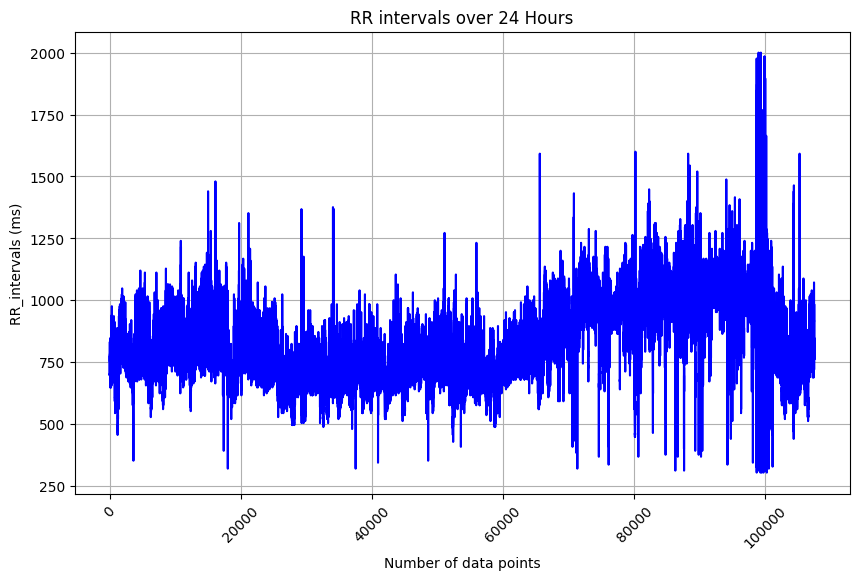

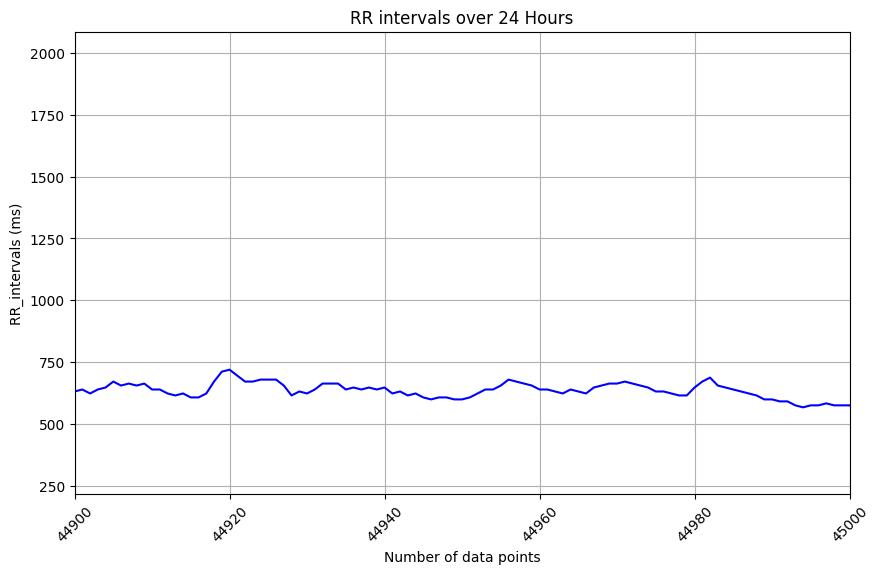

In [12]:
# Plot heart rate
plt.figure(figsize=(10, 6))
plt.plot(rr_data_cleaned, color='blue')
plt.title('RR intervals over 24 Hours')
plt.xlabel('Number of data points')
plt.ylabel('RR_intervals (ms)')
plt.grid(True)
plt.xticks(rotation=45)

# Plot heart rate in a fixed window to check dead time
plt.figure(figsize=(10, 6))
plt.plot(rr_data_cleaned, color='blue')
plt.title('RR intervals over 24 Hours')
plt.xlabel('Number of data points')
plt.ylabel('RR_intervals (ms)')
plt.xlim(44900,45000)
plt.grid(True)
plt.xticks(rotation=45)
#plt.tight_layout()
# First recording1 duration was 12h, 29m, 32s = 44972s -> check for dead time,
# because there was around 30s time difference between the two recordings
# Conclusion: The recordings were concatenated!!! No dead time, Should I subtract
# 30s from the time


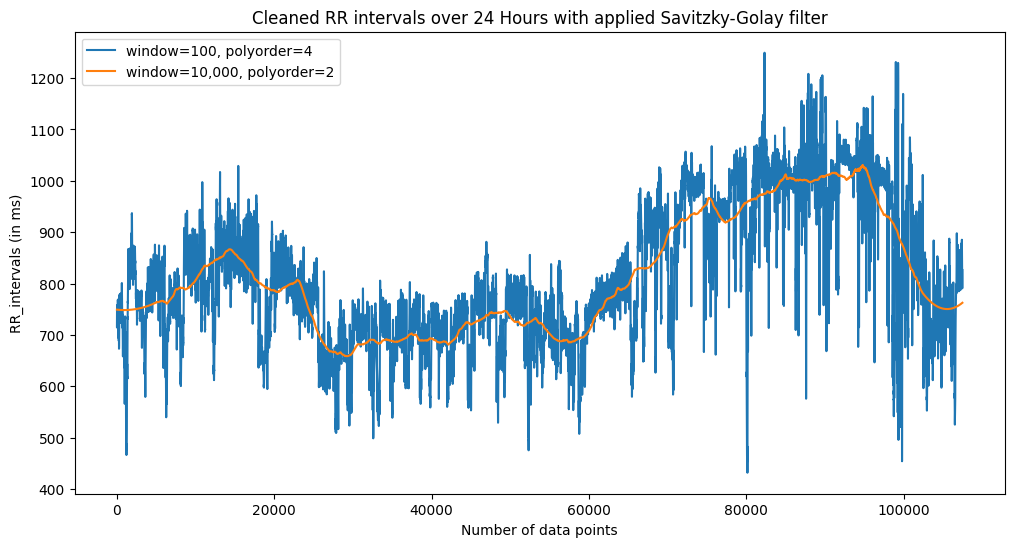

In [13]:
from scipy.signal import savgol_filter

signal_filtered_1 = savgol_filter(rr_data_cleaned, window_length=100, polyorder=4)
signal_filtered_2 = savgol_filter(rr_data_cleaned, window_length=10000, polyorder=2)

plt.figure(figsize=(12, 6))
plt.plot(signal_filtered_1, label='window=100, polyorder=4')
plt.plot(signal_filtered_2, label='window=10,000, polyorder=2')
#plt.plot(time_in_hours, upper_envelope, 'r--', label='Upper Envelope')
#plt.plot(time_in_hours, lower_envelope, 'r--', label='Lower Envelope')
#plt.fill_between(time_in_hours, lower_envelope, upper_envelope, color='gray', alpha=0.3)
plt.xlabel('Number of data points')
plt.ylabel('RR_intervals (in ms)')
plt.title('Cleaned RR intervals over 24 Hours with applied Savitzky-Golay filter')
plt.legend()
plt.show()

plt.show()

In [14]:
# Calculate the average RR interval time
mean_rr_time = np.mean(rr_data_cleaned)
print("Average interval time: ", mean_rr_time)

# Estimate the sample rate
sample_rate_estimate = 1 / (mean_rr_time/1000)

print("Estimated sample rate:", sample_rate_estimate, "Hz")

Average interval time:  811.9433346669271
Estimated sample rate: 1.231613041580318 Hz


In [15]:
# Calculate the time difference between the first and second recording. What is the DEAD TIME between them?
# We know that the first recording started at 06:54:32 AM and lasted 12h 29 min 32 s,
# The second part started at 19:24:28 and lasted 12h 1s.
from datetime import datetime, timedelta

# Starting time
start_time_firstR = datetime.strptime('06:54:32 AM', '%I:%M:%S %p')

# Time to add
time_to_add = timedelta(hours=12, minutes=29, seconds=32)

# Calculate the new time
end_time_firstR = start_time_firstR + time_to_add

# Convert to 12-hour format
end_time_firstR_ = end_time_firstR.strftime('%I:%M:%S %p')

print("The first recording ended at: ", end_time_firstR_)

start_time_secondR = datetime.strptime('07:24:28 PM', '%I:%M:%S %p')
time_diff = start_time_secondR - end_time_firstR
print("Dead time between the two recordings was:", time_diff)

The first recording ended at:  07:24:04 PM
Dead time between the two recordings was: 0:00:24


In [16]:
# Convert the time difference to seconds
time_diff_seconds = int(time_diff.total_seconds())
av_rr_in_seconds = mean_rr_time / 1000
num_of_missing_samples = time_diff_seconds / av_rr_in_seconds
print(time_diff_seconds, av_rr_in_seconds, num_of_missing_samples)
num_of_missing_samples = round(num_of_missing_samples)
print(num_of_missing_samples)

24 0.811943334666927 29.558712997927632
30


In [17]:
# Filling the number of samples during dead time with the MEAN of RR intervals

# Find the index where the dead time starts. It is equal with the length of the FIRST recording
index_dead_time_start = len(rr_list_1)

# Find the index where the dead time end
num_samples_dead_time = num_of_missing_samples
index_dead_time_end = index_dead_time_start + num_samples_dead_time

# Create array for the dead time filled with the mean RR-intervals
dead_time_filled = np.full(num_samples_dead_time, mean_rr_time)
print(dead_time_filled, len(dead_time_filled))

[811.94333467 811.94333467 811.94333467 811.94333467 811.94333467
 811.94333467 811.94333467 811.94333467 811.94333467 811.94333467
 811.94333467 811.94333467 811.94333467 811.94333467 811.94333467
 811.94333467 811.94333467 811.94333467 811.94333467 811.94333467
 811.94333467 811.94333467 811.94333467 811.94333467 811.94333467
 811.94333467 811.94333467 811.94333467 811.94333467 811.94333467] 30


In [18]:
# Create the full signal: first recording + dead time + second recording

print(len(rr_list_1), len(rr_list_2))
signal_part1 = np.concatenate((rr_list_1, dead_time_filled))
print(len(signal_part1))
full_signal = np.concatenate((signal_part1, rr_list_2))
print("Length of Raw data without deadtime:  ",len(raw_rr_data_combined))
print("Length of Raw data including deadtime: ", len(full_signal))

60695 46784
60725
Length of Raw data without deadtime:   107479
Length of Raw data including deadtime:  107509


In [19]:
# Cleaning the WHOLE signal containing dead time

# This remove outliers from signal
rr_intervals_without_outliers = remove_outliers(rr_intervals=full_signal,low_rri=500, high_rri=1200)
# This replaces outliers nan values with linear interpolation
interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers,interpolation_method="linear")
# This remove ectopic beats from signal
nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
# This replaces ectopic beats nan values with linear interpolation
interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)
full_signal_cleaned = interpolated_nn_intervals

1909 outlier(s) have been deleted.
The outlier(s) value(s) are : [264.0, 1272.0, 1392.0, 1408.0, 488.0, 496.0, 488.0, 488.0, 488.0, 480.0, 472.0, 480.0, 488.0, 488.0, 496.0, 488.0, 496.0, 488.0, 488.0, 496.0, 496.0, 488.0, 496.0, 488.0, 496.0, 488.0, 496.0, 488.0, 496.0, 488.0, 496.0, 488.0, 488.0, 488.0, 488.0, 480.0, 488.0, 488.0, 480.0, 480.0, 480.0, 472.0, 472.0, 472.0, 464.0, 472.0, 464.0, 456.0, 456.0, 464.0, 464.0, 464.0, 464.0, 464.0, 472.0, 472.0, 480.0, 472.0, 480.0, 472.0, 480.0, 472.0, 480.0, 480.0, 480.0, 472.0, 472.0, 464.0, 480.0, 472.0, 472.0, 480.0, 472.0, 472.0, 480.0, 472.0, 472.0, 480.0, 472.0, 472.0, 472.0, 480.0, 464.0, 480.0, 472.0, 480.0, 488.0, 496.0, 440.0, 264.0, 264.0, 352.0, 1416.0, 1352.0, 1216.0, 1344.0, 1240.0, 1400.0, 1216.0, 1368.0, 1368.0, 1272.0, 1352.0, 1440.0, 1464.0, 1232.0, 1448.0, 1280.0, 1208.0, 1480.0, 1368.0, 392.0, 1336.0, 488.0, 480.0, 320.0, 1312.0, 264.0, 1424.0, 1408.0, 1352.0, 1208.0, 1408.0, 1360.0, 1376.0, 1216.0, 1472.0, 1224.0, 496.

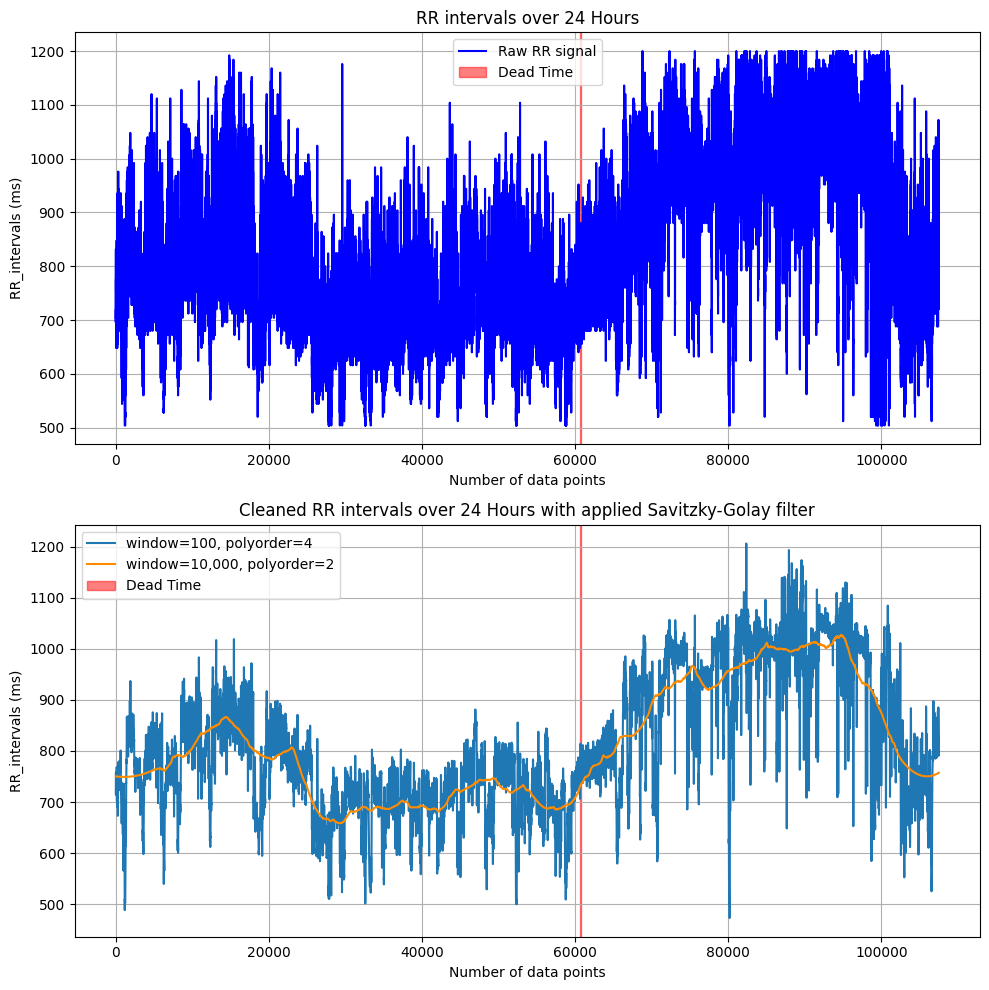

In [20]:
# Plot RR intervals
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(full_signal_cleaned, color='blue', label= 'Raw RR signal')
plt.axvspan(index_dead_time_start, index_dead_time_end, color='red', alpha=0.5, label='Dead Time')
plt.title('RR intervals over 24 Hours')
plt.xlabel('Number of data points')
plt.ylabel('RR_intervals (ms)')
plt.legend()
plt.grid(True)

# Filtering by Savitzky-Golay filter
signal_filtered_1 = savgol_filter(full_signal_cleaned, window_length=100, polyorder=4)
signal_filtered_2 = savgol_filter(full_signal_cleaned, window_length=10000, polyorder=2)
# Plot filtered signals
#plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
plt.plot(signal_filtered_1, label='window=100, polyorder=4')
plt.plot(signal_filtered_2, color='darkorange', label='window=10,000, polyorder=2')
# Plot the filled gap
plt.axvspan(index_dead_time_start, index_dead_time_end, color='red', alpha=0.5, label='Dead Time')

plt.xlabel('Number of data points')
plt.ylabel('RR_intervals (ms)')
plt.title('Cleaned RR intervals over 24 Hours with applied Savitzky-Golay filter')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
sum_all_values = np.sum(full_signal_cleaned)
sum_all_values

87275088.23813523

In [22]:
import datetime

# Assume a starting time
start_time = datetime.datetime(2024, 2, 7, 6, 54, 32)  # Example starting time

# Calculate cumulative sum of RR-intervals
cumulative_sum = np.cumsum(full_signal_cleaned)

# Create timestamps
timestamps = [start_time + datetime.timedelta(milliseconds=ms) for ms in cumulative_sum]

# Print timestamps
#for i, timestamp in enumerate(timestamps):
    #print(f"Timestamp {i + 1}: {timestamp}")
import pandas as pd

# Assuming 'timestamps' is the list of timestamps
timestamps_data = [{"Timestamp": i + 1, "Value": timestamp} for i, timestamp in enumerate(timestamps)]

# Create DataFrame
df_time = pd.DataFrame(timestamps_data)

# Display DataFrame
print(df_time.tail())


# Write timestamps to a file
#with open('timestamps.txt', 'w') as f:
 #   for i, timestamp in enumerate(timestamps):
  #      f.write(f"Timestamp {i + 1}: {timestamp}\n")

        Timestamp                      Value
107504     107505 2024-02-08 07:09:03.888238
107505     107506 2024-02-08 07:09:04.680238
107506     107507 2024-02-08 07:09:05.456238
107507     107508 2024-02-08 07:09:06.256238
107508     107509 2024-02-08 07:09:07.088238


C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 27, using nperseg = 27
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 25, using nperseg = 25
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 26, using nperseg = 26
  warnings.warn('nperseg = {0:d} is greater than input lengt

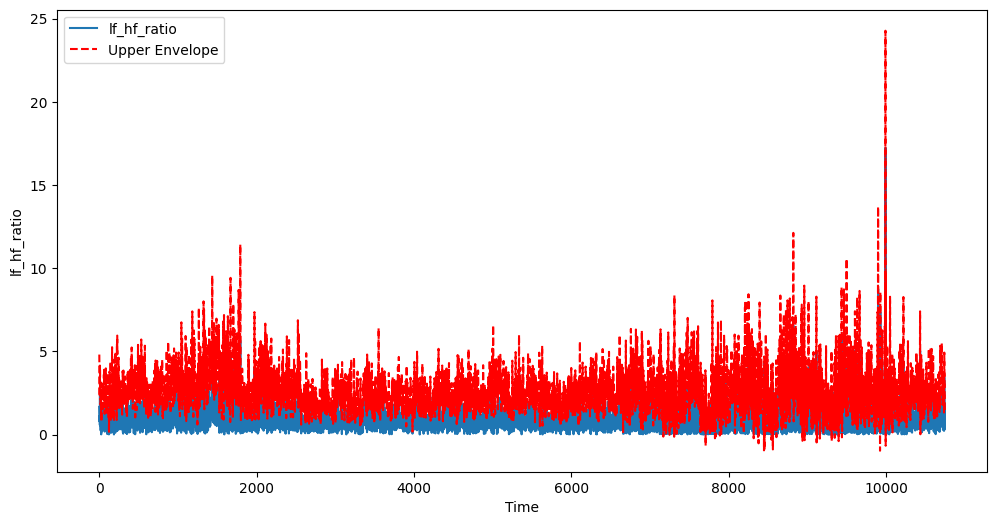

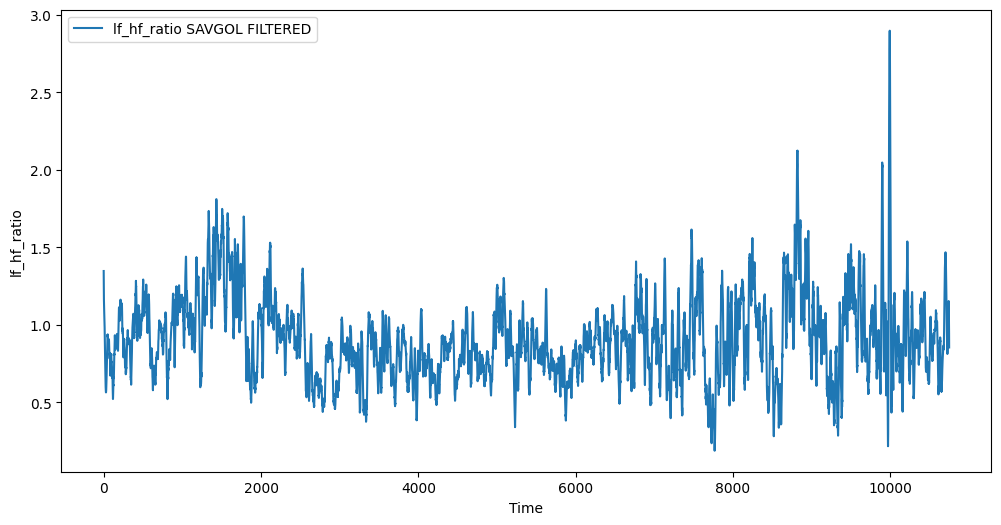

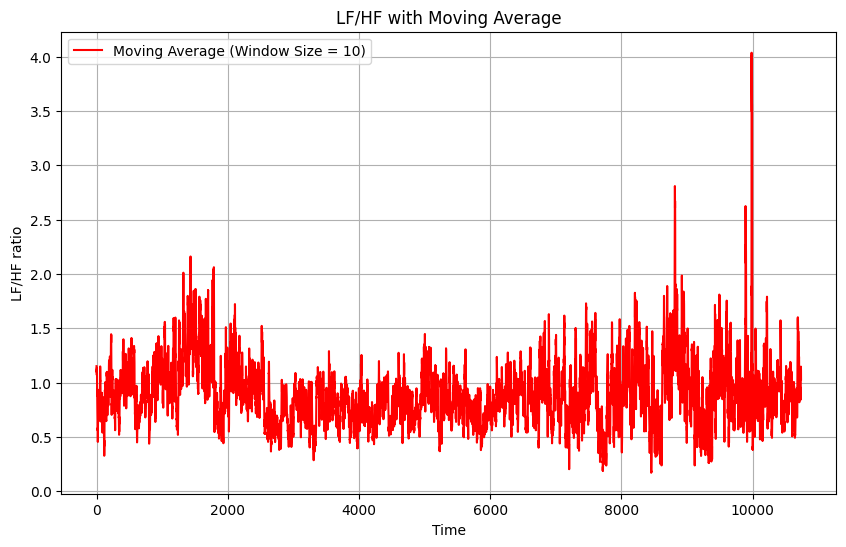

In [23]:
def sliding_window_analysis(nn_intervals, window_length): #, overlap_percentage):
    results = []

    # # Calculate overlap based on the percentage
    # overlap = int(window_length * (overlap_percentage / 100))

    # # Iterate through the NN intervals with the sliding window
    # for i in range(0, len(nn_intervals) - window_length + 1, overlap):
    #     window = nn_intervals[i:i + window_length]

    # Iterate through the NN intervals with window_length steps
    for i in range(0, len(nn_intervals), window_length):
        window = nn_intervals[i:i + window_length]
        # Calculate time-domain features for the current window
        window_features = get_frequency_domain_features(window)

        # Append the results to the list
        results.append(window_features['lf_hf_ratio'])

    return results

    # Set the window length and overlap percentage
window_length = 10  # Replace with your desired window length (number of data points)
overlap_percentage = 90  # Replace with your desired overlap percentage

# Perform sliding window analysis
results = sliding_window_analysis(rr_data_cleaned, window_length) #overlap_percentage)

signal_filtered = savgol_filter(results, window_length=100, polyorder=8)

upper_envelope = savgol_filter(results, window_length, polyorder=4) + 2 * savgol_filter(results, window_length, polyorder=4)

plt.figure(figsize=(12, 6))
plt.plot(results, label='lf_hf_ratio')
plt.plot(upper_envelope, 'r--', label='Upper Envelope')
#plt.plot(time_in_hours, lower_envelope, 'r--', label='Lower Envelope')
#plt.fill_between(time_in_hours, lower_envelope, upper_envelope, color='gray', alpha=0.3)
plt.xlabel("Time")
plt.ylabel('lf_hf_ratio')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(signal_filtered, label='lf_hf_ratio SAVGOL FILTERED')
plt.xlabel("Time")
plt.ylabel('lf_hf_ratio')
plt.legend()

plt.show()

import numpy as np
import matplotlib.pyplot as plt

def moving_average(signal, window_size):
    """Compute the moving average of a signal."""
    window = np.ones(window_size) / window_size
    return np.convolve(signal, window, mode='valid')

# Example signal (replace with your signal)
#signal = np.random.randn(100)

# Window size for moving average
window_size = 10

# Compute moving average
moving_avg = moving_average(results, window_size)

# Plot original signal and moving average
plt.figure(figsize=(10, 6))
#plt.plot(signal, label='Original Signal', color='blue')
plt.plot(moving_avg, label=f'Moving Average (Window Size = {window_size})', color='red')
plt.title('LF/HF with Moving Average')
plt.xlabel('Time')
plt.ylabel('LF/HF ratio')
plt.legend()
plt.grid(True)
plt.show()



C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\hrvanalysis\extract_features.py:434: RuntimeWarning: invalid value encountered in scalar divide
  lf_hf_ratio = lf / hf
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\hrvanalysis\extract_features.py:435: RuntimeWarning: invalid value encountered in scalar divide
  lfnu = (lf / (lf + hf)) * 100
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\hrvanalysis\extract_features.py:436: RuntimeWarning: invalid value encountered in scalar divide
  hfnu = (hf / (lf + hf)) * 100


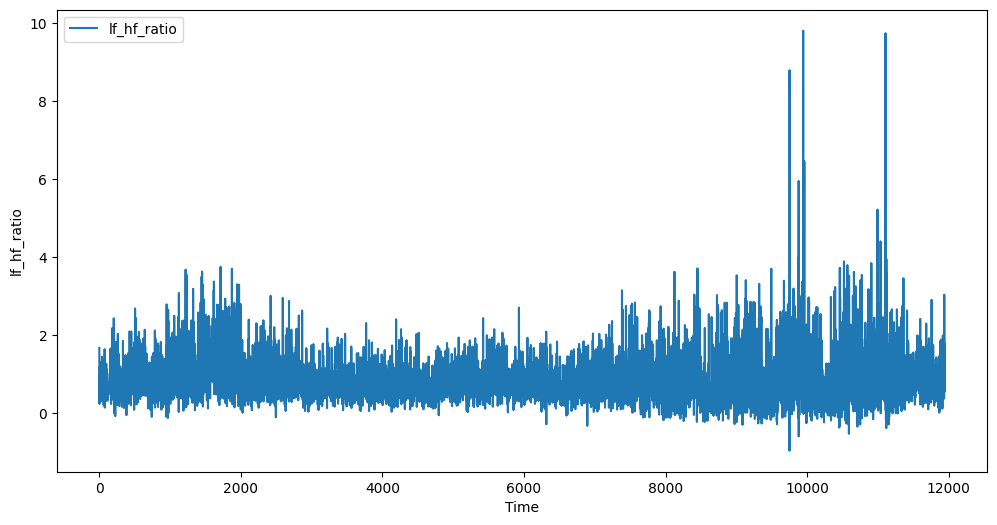

In [24]:
def sliding_window_analysis(nn_intervals, window_length, overlap_percentage):
    results = []

    # Calculate overlap based on the percentage
    overlap = int(window_length * (overlap_percentage / 100))

    # Iterate through the NN intervals with the sliding window
    for i in range(0, len(nn_intervals) - window_length + 1, overlap):
        window = nn_intervals[i:i + window_length]

        # Calculate time-domain features for the current window
        window_features = get_frequency_domain_features(window)

        # Append the results to the list
        results.append(window_features['lf_hf_ratio'])

    return results

    # Set the window length and overlap percentage
window_length = 10  # Replace with your desired window length (number of data points)
overlap_percentage = 90  # Replace with your desired overlap percentage
# Perform sliding window analysis
results = sliding_window_analysis(full_signal_cleaned, window_length, overlap_percentage)
signal_filtered = savgol_filter(results, window_length=window_length, polyorder=8)

plt.figure(figsize=(12, 6))
plt.plot(signal_filtered, label='lf_hf_ratio')
#plt.plot(time_in_hours, upper_envelope, 'r--', label='Upper Envelope')
#plt.plot(time_in_hours, lower_envelope, 'r--', label='Lower Envelope')
#plt.fill_between(time_in_hours, lower_envelope, upper_envelope, color='gray', alpha=0.3)
plt.xlabel("Time")
plt.ylabel('lf_hf_ratio')
plt.legend()
plt.show()

In [25]:
# print(len(nn_intervals_list), len(nn_intervals_list2))
# concatenated_sig = np.concatenate((interpolated_nn_intervals, dead_time_filled))
# print(len(concatenated_sig))
# concatenated_signal = np.concatenate((concatenated_sig, interpolated_nn_intervals2))
# print(len(concatenated_signal))

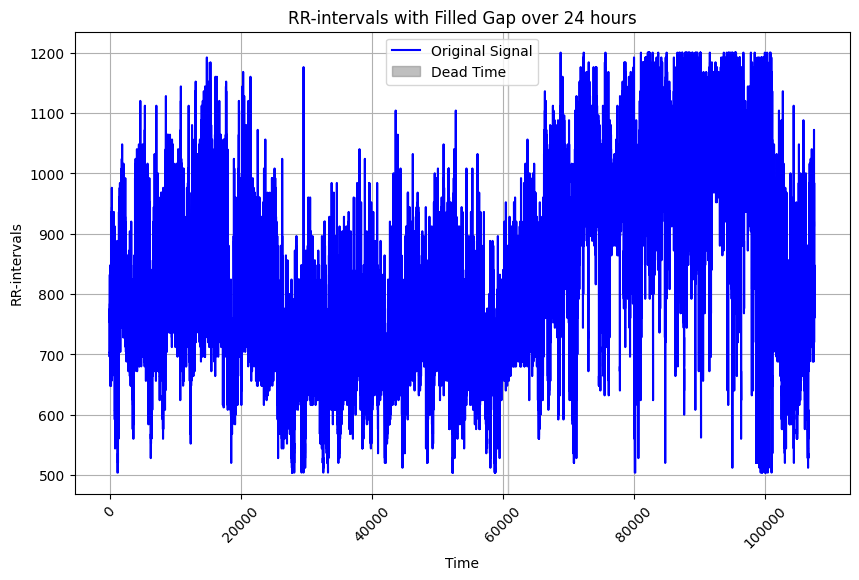

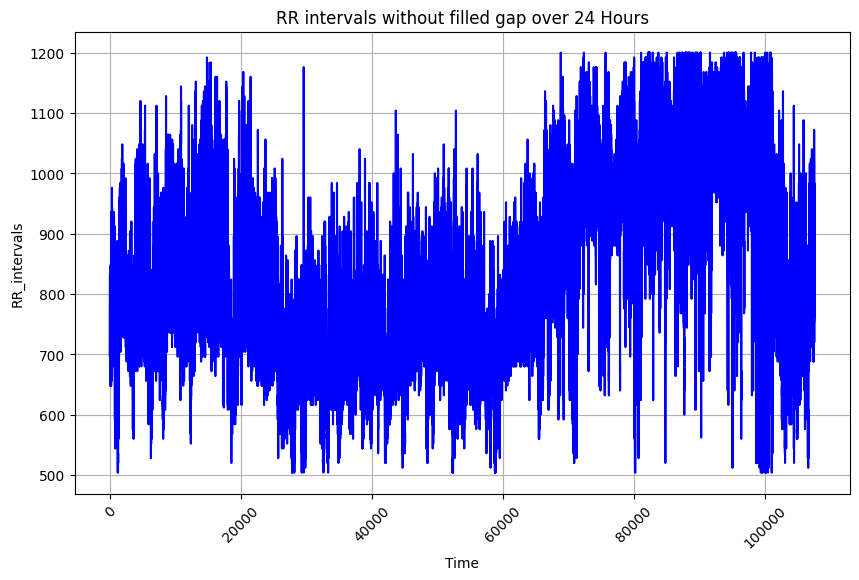

In [26]:
import matplotlib.pyplot as plt

# Assuming rr_data_combined contains the concatenated signal

# Plot the original signal
plt.figure(figsize=(10, 6))
plt.plot(full_signal_cleaned, label='Original Signal', color='blue')

# Plot the filled gap
plt.axvspan(index_dead_time_start, index_dead_time_end, color='gray', alpha=0.5, label='Dead Time')

plt.title('RR-intervals with Filled Gap over 24 hours')
plt.xlabel('Time')
plt.ylabel('RR-intervals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Plot heart rate
plt.figure(figsize=(10, 6))
plt.plot(full_signal_cleaned, color='blue')
plt.title('RR intervals without filled gap over 24 Hours')
plt.xlabel('Time')
plt.ylabel('RR_intervals')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [27]:
# # Calculate the sum of all values from both measurements
# sum_all_values = np.sum(rr_data_0_12) + np.sum(rr_data_12_24)
# print(sum_all_values)
# sum_concat = np.sum(rr_data_combined_cleaned)
# print(sum_concat)

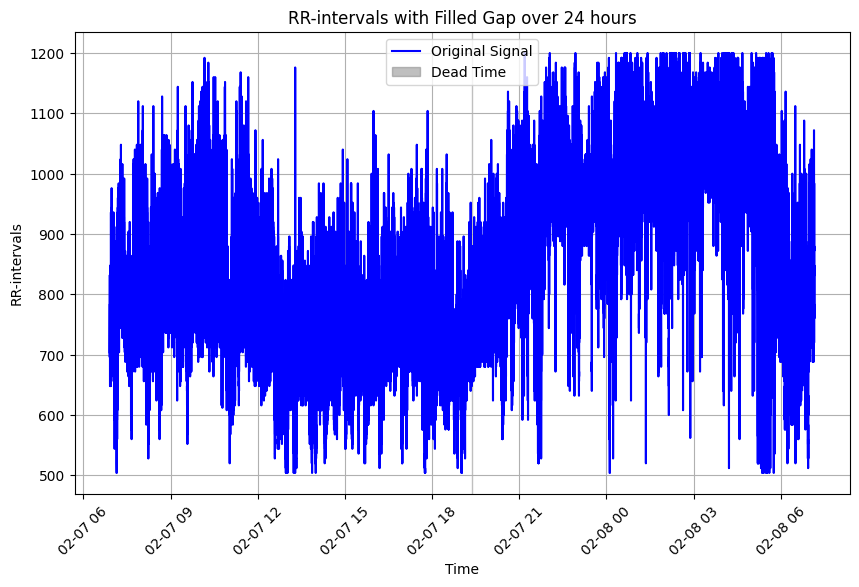

In [28]:
import matplotlib.pyplot as plt
import datetime

# Plot the signal against timestamps
plt.figure(figsize=(10, 6))
plt.plot(timestamps, full_signal_cleaned, label='Original Signal', color='blue')

# Plot the filled gap
plt.axvspan(timestamps[index_dead_time_start], timestamps[index_dead_time_end], color='gray', alpha=0.5, label='Dead Time')

plt.title('RR-intervals with Filled Gap over 24 hours')
plt.xlabel('Time')
plt.ylabel('RR-intervals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


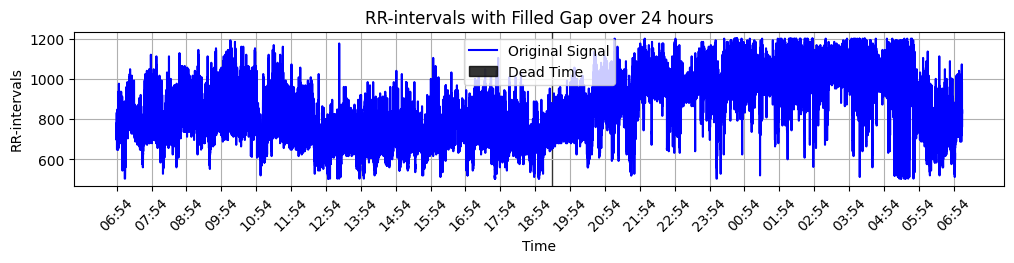

In [29]:
import pandas as pd


# Convert timestamps to Unix timestamps (numerical values)
timestamps_unix = [ts.timestamp() for ts in timestamps]

# Create DataFrame with timestamps and signal values
df = pd.DataFrame({'Timestamp': timestamps_unix, 'RR-intervals': full_signal_cleaned})

# Plot the signal against timestamps
plt.figure(figsize=(12, 2))
plt.plot(df['Timestamp'], df['RR-intervals'], label='Original Signal', color='blue')

# Plot the filled gap
dead_time_start_timestamp = df['Timestamp'].iloc[index_dead_time_start]
dead_time_end_timestamp = df['Timestamp'].iloc[index_dead_time_end]
plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='black', alpha=0.8, label='Dead Time')

plt.title('RR-intervals with Filled Gap over 24 hours')
plt.xlabel('Time')
plt.ylabel('RR-intervals')
plt.legend()
plt.grid(True)

# Format x-axis ticks to display only hours
#plt.xticks(rotation=45)
# Set x-ticks for every hour
plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))

plt.show()



In [30]:
df.head()

Timestamp  RR-intervals
0  1.707285e+09         704.0
1  1.707285e+09         720.0
2  1.707285e+09         696.0
3  1.707285e+09         712.0
4  1.707285e+09         728.0

In [31]:
dead_time_start_timestamp = df['Timestamp'].iloc[index_dead_time_start]
dead_time_end_timestamp = df['Timestamp'].iloc[index_dead_time_end]
print(dead_time_start_timestamp)

1707330170.723943


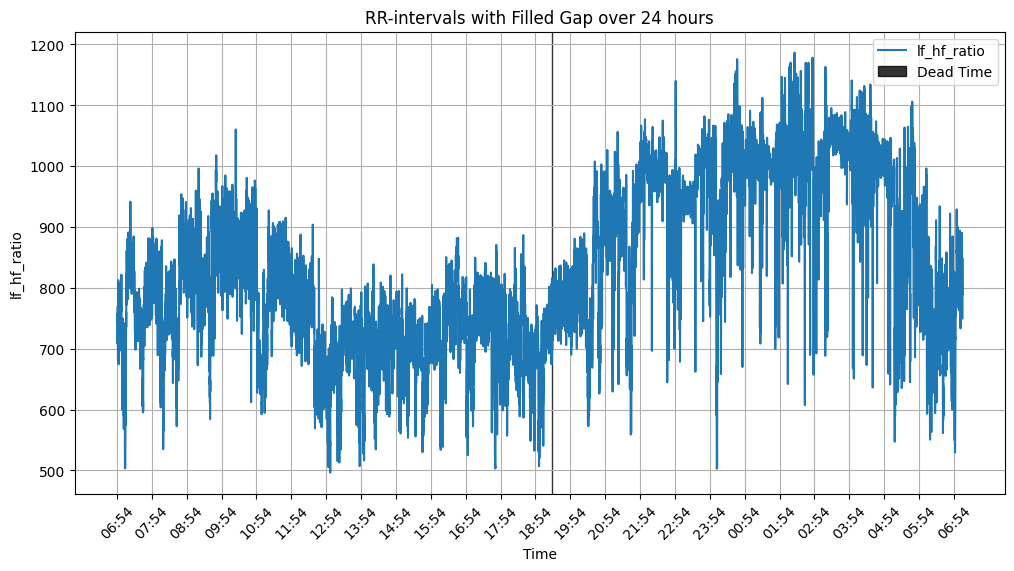

In [32]:
# Define sliding window analysis function
def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))
    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps)
        results.append((window_center_time, window_mean))
    return results

# Set the window length and overlap percentage
window_length = 10  # Replace with your desired window length (number of data points)
overlap_percentage = 90  # Replace with your desired overlap percentage

# Perform sliding window analysis
window_results = sliding_window_analysis(df['RR-intervals'].values, df['Timestamp'].values, window_length, overlap_percentage)

# Unzip the results to get timestamps and filtered signal
window_timestamps, signal_filtered = zip(*window_results)

# Smooth the results using a Savitzky-Golay filter
signal_filtered_smoothed = savgol_filter(signal_filtered, window_length=window_length, polyorder=8)

# Plot the filtered signal
plt.figure(figsize=(12, 6))
plt.plot(window_timestamps, signal_filtered_smoothed, label='lf_hf_ratio')
plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='black', alpha=0.8, label='Dead Time')
plt.title('RR-intervals with Filled Gap over 24 hours')
plt.xlabel("Time")
plt.ylabel('lf_hf_ratio')
plt.legend()
plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
plt.grid(True)
plt.show()


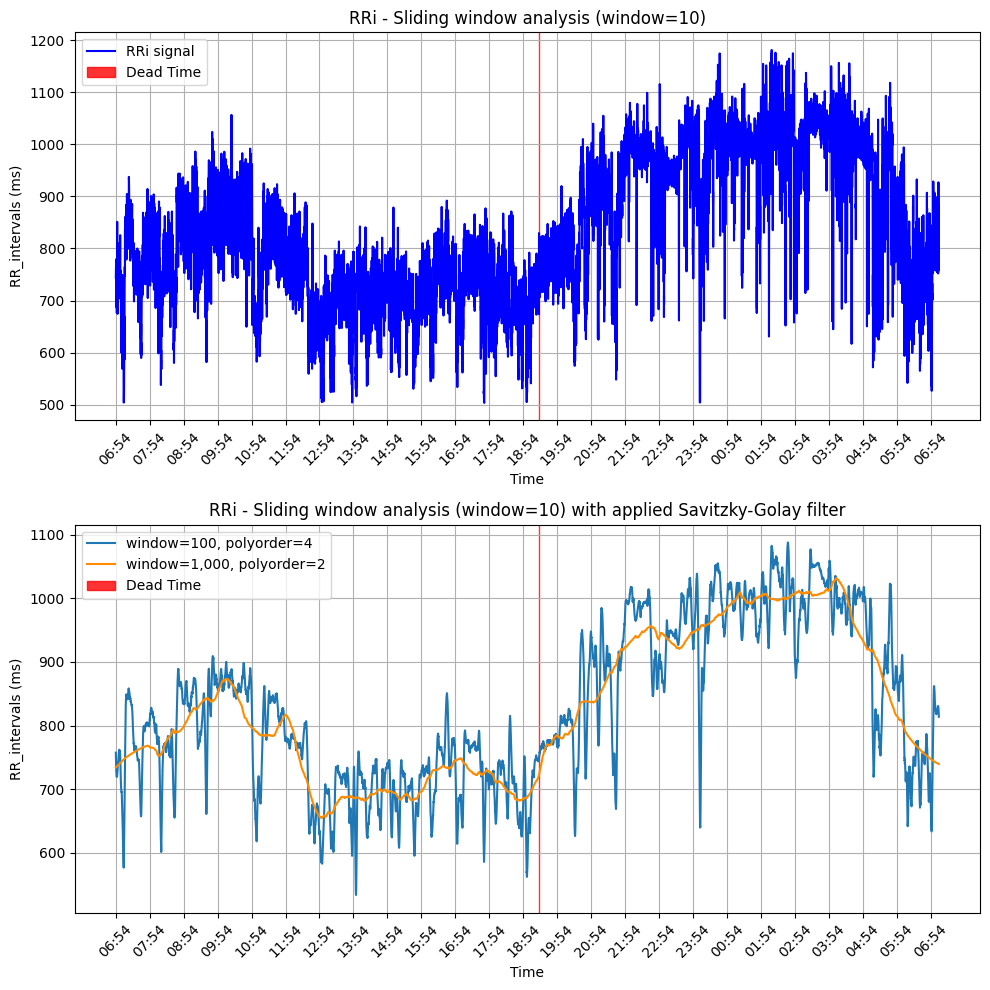

In [33]:
# Define sliding window analysis function
def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))
    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps)
        results.append((window_center_time, window_mean))
    return results

# Set the window length and overlap percentage
window_length = 10  # Replace with your desired window length (number of data points)
overlap_percentage = 90  # Replace with your desired overlap percentage

# Perform sliding window analysis
window_results = sliding_window_analysis(df['RR-intervals'].values, df['Timestamp'].values, window_length, overlap_percentage)

# Unzip the results to get timestamps and filtered signal
window_timestamps, full_signal_with_time = zip(*window_results)

# Plot RR intervals
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(window_timestamps, full_signal_with_time, color='blue', label= 'RRi signal')
#plt.axvspan(index_dead_time_start, index_dead_time_end, color='red', alpha=0.5, label='Dead Time')
plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')

plt.title('RRi - Sliding window analysis (window=10)')
plt.xlabel('Time')
plt.ylabel('RR_intervals (ms)')
plt.legend()
plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
plt.grid(True)

# Filtering by Savitzky-Golay filter
signal_filtered_1 = savgol_filter(full_signal_with_time, window_length=100, polyorder=4)
signal_filtered_2 = savgol_filter(full_signal_with_time, window_length=1000, polyorder=2)
# Plot filtered signals
#plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
plt.plot(window_timestamps, signal_filtered_1, label='window=100, polyorder=4')
plt.plot(window_timestamps, signal_filtered_2, color='darkorange', label='window=1,000, polyorder=2')
# Plot the filled gap
#plt.axvspan(index_dead_time_start, index_dead_time_end, color='red', alpha=0.5, label='Dead Time')
plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')

plt.xlabel('Time')
plt.ylabel('RR_intervals (ms)')
plt.title('RRi - Sliding window analysis (window=10) with applied Savitzky-Golay filter')
plt.legend()
plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
plt.grid(True)

plt.tight_layout()
plt.show()

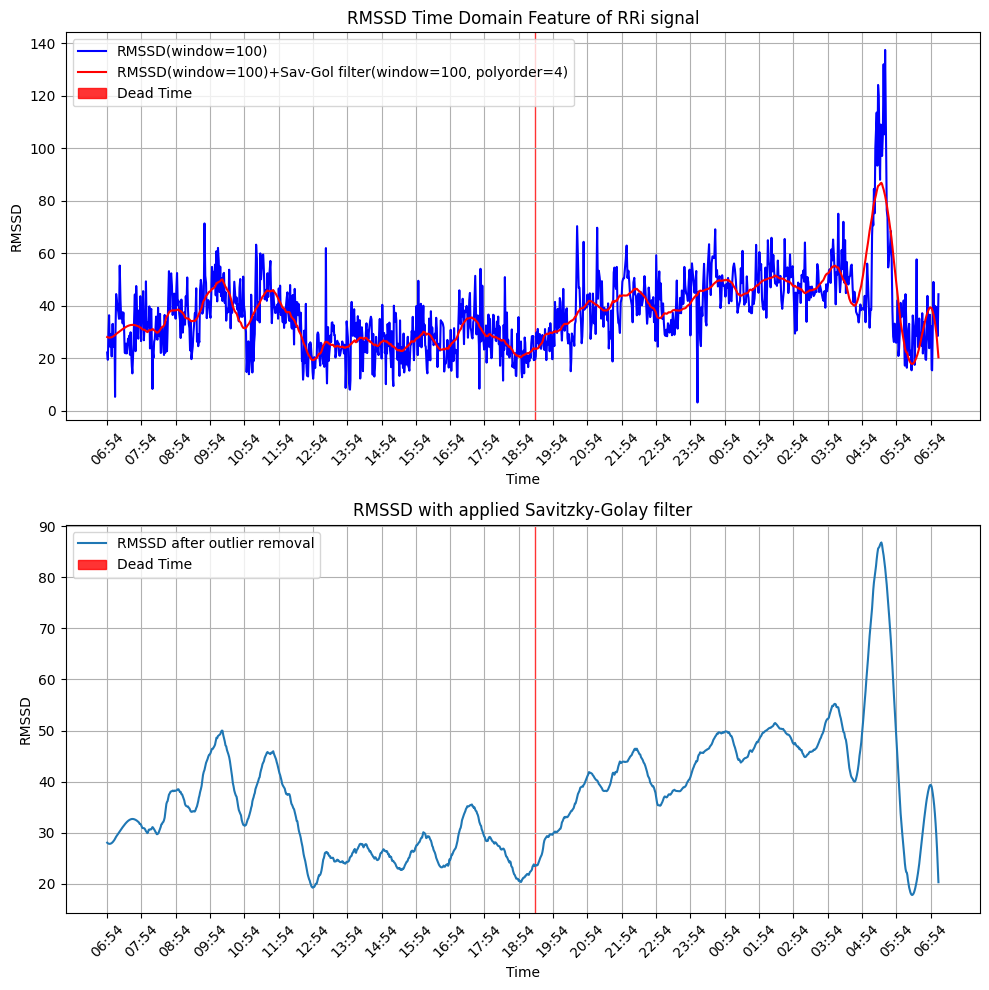

In [34]:
# Define sliding window analysis function
def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))
    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps)
        window_features = get_time_domain_features(window)
        results.append((window_center_time, window_mean, window_features['rmssd']))
    return results

# Set the window length and overlap percentage
window_length = 100  # Replace with your desired window length (number of data points)
overlap_percentage = 90  # Replace with your desired overlap percentage

# Perform sliding window analysis
window_results = sliding_window_analysis(df['RR-intervals'].values, df['Timestamp'].values, window_length, overlap_percentage)

# Unzip the results to get timestamps and filtered signal
window_timestamps, full_signal_with_time, time_domain_feature = zip(*window_results)

# Plot RR intervals
plt.figure(figsize=(10, 10))

# Filtering by Savitzky-Golay filter
#signal_filtered_1 = savgol_filter(time_domain_feature, window_length=10, polyorder=4)
signal_filtered_2 = savgol_filter(time_domain_feature, window_length=100, polyorder=4)

# Plot filtered signals
#plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(window_timestamps, time_domain_feature, color= 'blue',label='RMSSD(window=100)')
plt.plot(window_timestamps, signal_filtered_2, color='red', label='RMSSD(window=100)+Sav-Gol filter(window=100, polyorder=4)')
# Plot the filled gap
plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')

plt.xlabel('Time')
plt.ylabel('RMSSD')
plt.title('RMSSD Time Domain Feature of RRi signal')
plt.legend()
plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
plt.grid(True)

# Filter out outliers above 100
signal_filtered_2_filtered = np.where(signal_filtered_2 > 100, np.nan, signal_filtered_2)

plt.subplot(2, 1, 2)
# Plot the filtered signal
plt.plot(window_timestamps, signal_filtered_2_filtered, label='RMSSD after outlier removal')
plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')

plt.xlabel('Time')
plt.ylabel('RMSSD')
plt.title('RMSSD with applied Savitzky-Golay filter')
plt.legend()
plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 243, using nperseg = 243
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 205, using nperseg = 205
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  warnings.warn('nperseg = {0:d} is greater than inp

<Figure size 1000x1000 with 0 Axes>

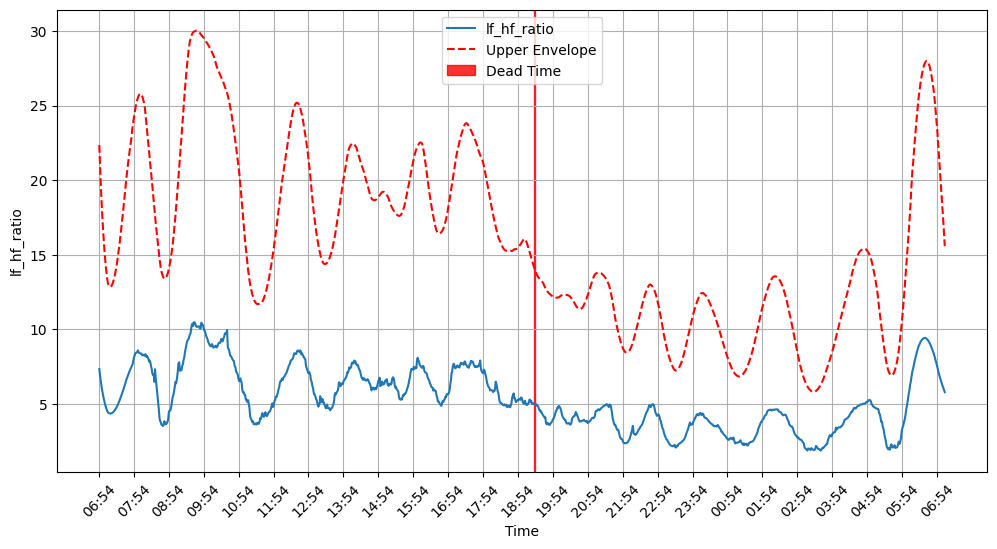

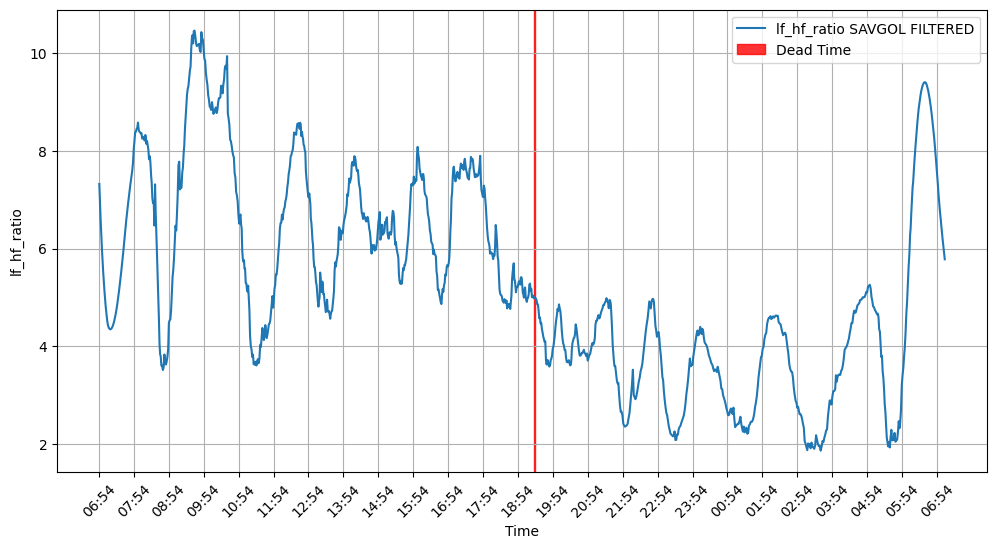

In [35]:
# Define sliding window analysis function
def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))
    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps_ = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps_)
        window_features = get_frequency_domain_features(window)
        results.append((window_center_time, window_mean, window_features['lf_hf_ratio']))
    return results

# Set the window length and overlap percentage
window_length = 100  # Replace with your desired window length (number of data points)
overlap_percentage = 90  # Replace with your desired overlap percentage

# Perform sliding window analysis
window_results = sliding_window_analysis(df['RR-intervals'].values, df['Timestamp'].values, window_length, overlap_percentage)

# Unzip the results to get timestamps and filtered signal
window_timestamps, full_signal_with_time, freq_domain_feature = zip(*window_results)

# Plot RR intervals
plt.figure(figsize=(10, 10))


freq_domain_filtered = savgol_filter(freq_domain_feature, window_length=100, polyorder=4)

upper_envelope = savgol_filter(freq_domain_filtered, window_length, polyorder=4) + 2 * savgol_filter(freq_domain_filtered, window_length, polyorder=4)

plt.figure(figsize=(12, 6))
plt.plot(window_timestamps, freq_domain_filtered, label='lf_hf_ratio')
plt.plot(window_timestamps, upper_envelope, 'r--', label='Upper Envelope')
# Plot the filled gap
plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')
#plt.plot(time_in_hours, lower_envelope, 'r--', label='Lower Envelope')
#plt.fill_between(time_in_hours, lower_envelope, upper_envelope, color='gray', alpha=0.3)
plt.xlabel("Time")
plt.ylabel('lf_hf_ratio')
plt.legend()
plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
plt.grid(True)


plt.figure(figsize=(12, 6))
plt.plot(window_timestamps, freq_domain_filtered, label='lf_hf_ratio SAVGOL FILTERED')
# Plot the filled gap
plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')
plt.xlabel("Time")
plt.ylabel('lf_hf_ratio')
plt.legend()
plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
plt.grid(True)

plt.show()

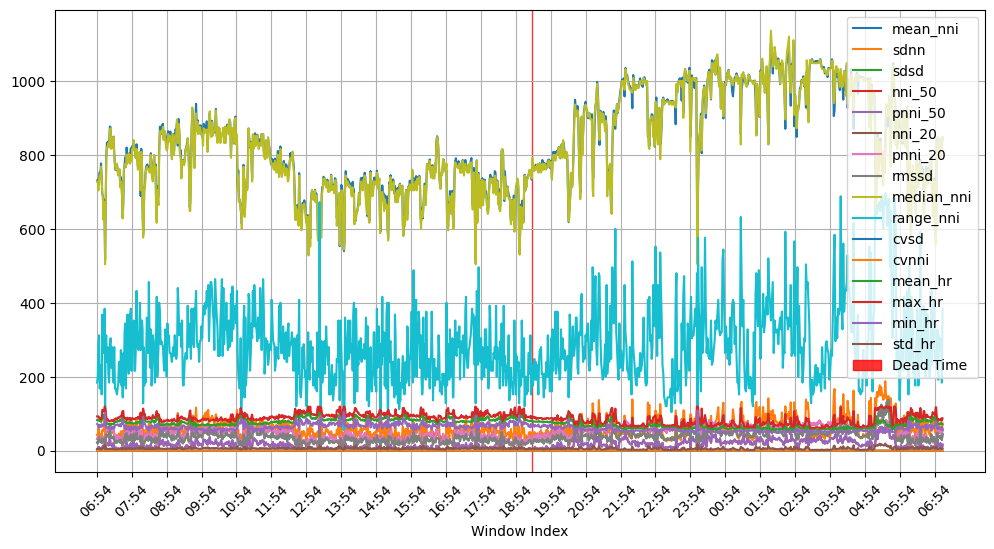

In [36]:
def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))
    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps_ = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps_)
        window_features = get_time_domain_features(window)
        results.append((window_center_time, window_mean, window_features))
    return results

def plot_results(time,results, feature_names, timestamps_unix, dead_time_start_timestamp, dead_time_end_timestamp):
    plt.figure(figsize=(12, 6))

    for feature_name in feature_names:
        plt.plot(time, [result[feature_name] for result in results], label=feature_name)

    plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')
    plt.xlabel("Window Index")
    plt.legend()
    plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
    plt.grid(True)
    plt.show()

# Set the window length and overlap percentage
window_length = 100  # Replace with your desired window length (number of data points)
overlap_percentage = 90  # Replace with your desired overlap percentage

# Perform sliding window analysis
window_results = sliding_window_analysis(df['RR-intervals'].values, df['Timestamp'].values, window_length, overlap_percentage)

# Unzip the results to get timestamps and filtered signal
window_timestamps, full_signal_with_time, time_d_features = zip(*window_results)

# Extract all frequency-domain features
feature_names = list(time_d_features[0].keys())

# Plot the results for all frequency-domain features
plot_results(window_timestamps, time_d_features, feature_names, timestamps_unix, dead_time_start_timestamp, dead_time_end_timestamp)


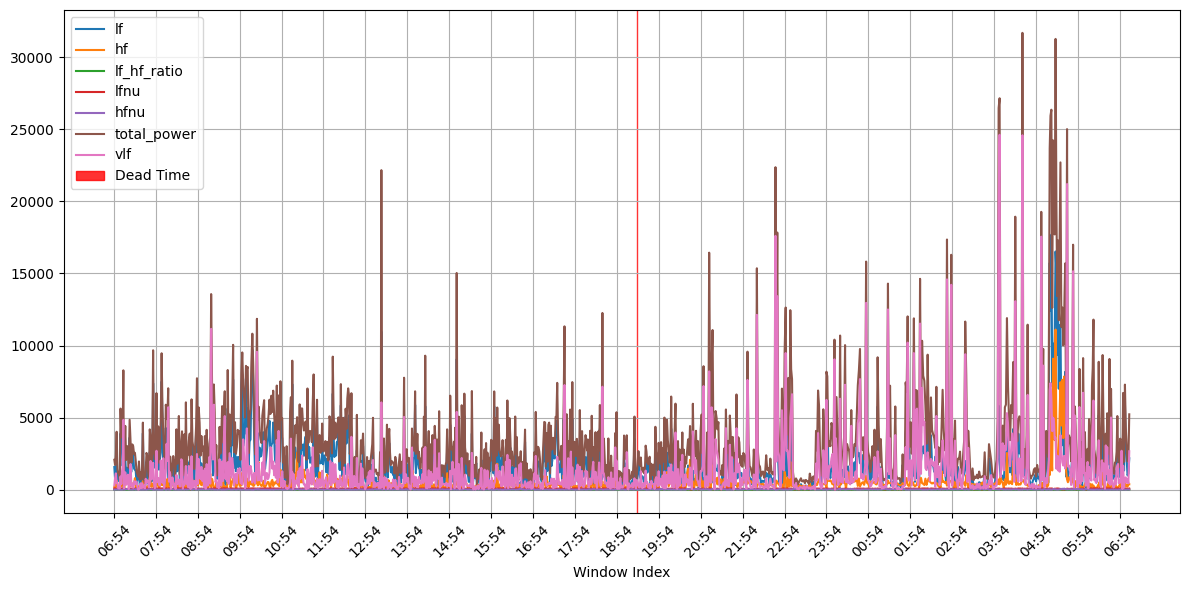

0       1                                                  2
0  1.707285e+09  728.64  {'lf': 1575.0433783061344, 'hf': 198.220412640...
1  1.707285e+09  732.96  {'lf': 752.6989911080697, 'hf': 154.4489075674...
2  1.707285e+09  719.00  {'lf': 1046.772180174902, 'hf': 222.6880211966...
3  1.707286e+09  742.40  {'lf': 2919.598770292577, 'hf': 636.1739568147...
4  1.707286e+09  752.40  {'lf': 599.6418382204193, 'hf': 334.2895510389...

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from hrvanalysis import get_frequency_domain_features

def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))
    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps_ = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps_)
        window_features = get_frequency_domain_features(window)
        results.append((window_center_time, window_mean, window_features))
    return results

def plot_results(time,results, feature_names, timestamps_unix, dead_time_start_timestamp, dead_time_end_timestamp):
    plt.figure(figsize=(12, 6))

    for feature_name in feature_names:
        plt.plot(time, [result[feature_name] for result in results], label=feature_name)

    plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')
    plt.xlabel("Window Index")
    plt.legend()
    plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Set the window length and overlap percentage
window_length = 100  # Replace with your desired window length (number of data points)
overlap_percentage = 90  # Replace with your desired overlap percentage

# Perform sliding window analysis
window_results = sliding_window_analysis(df['RR-intervals'].values, df['Timestamp'].values, window_length, overlap_percentage)

# Unzip the results to get timestamps and filtered signal
window_timestamps, full_signal_with_time, freq_d_features = zip(*window_results)

# Extract all frequency-domain features
feature_names = list(freq_d_features[0].keys())

# Plot the results for all frequency-domain features
plot_results(window_timestamps, freq_d_features, feature_names, timestamps_unix, dead_time_start_timestamp, dead_time_end_timestamp)
# Convert results to a DataFrame for better visualization
result_df = pd.DataFrame(window_results)
display(result_df.head())

C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 243, using nperseg = 243
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 205, using nperseg = 205
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  warnings.warn('nperseg = {0:d} is greater than inp

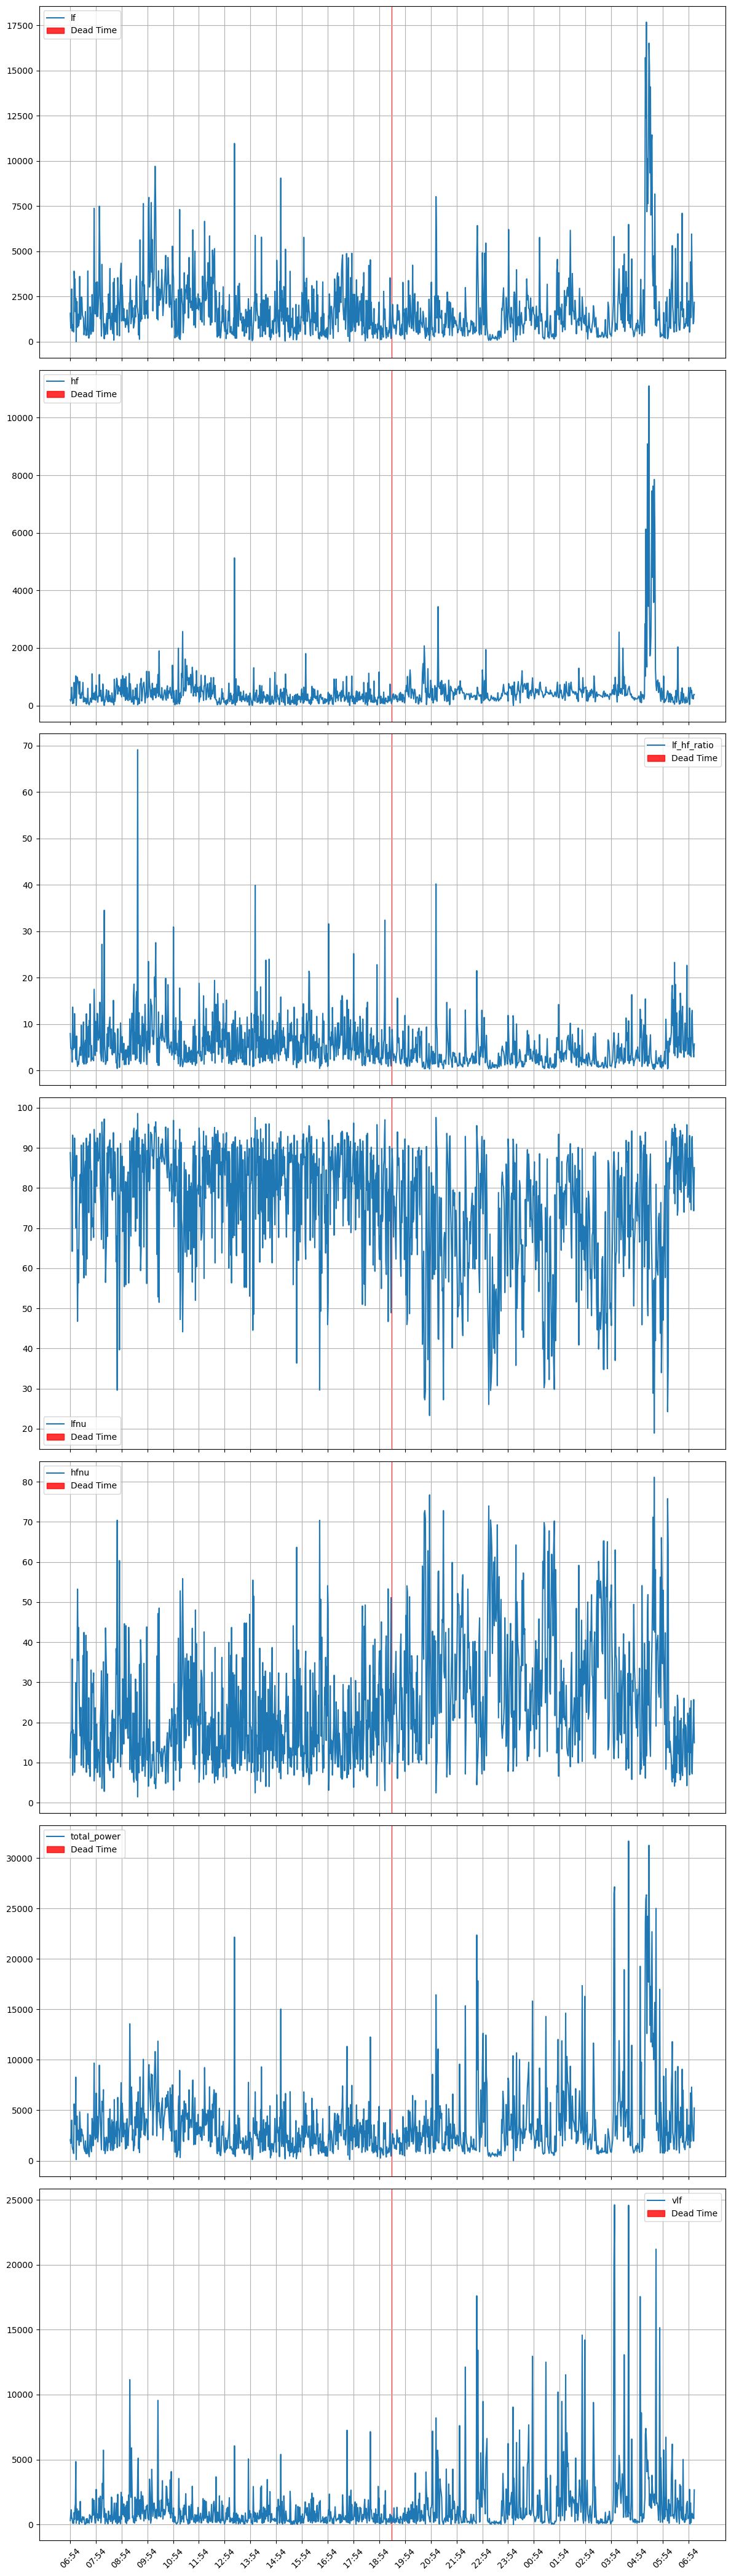

In [38]:
from hrvanalysis.plot import VlfBand, LfBand, HfBand
def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))
    # Assuming 'v' is a list of NN intervals
    vlf_band = VlfBand(low=0.003, high=0.04)
    lf_band = LfBand(low=0.04, high=0.15)
    hf_band = HfBand(low=0.15, high=0.4)
    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps_ = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps_)
        window_features = get_frequency_domain_features(window, vlf_band=vlf_band, lf_band=lf_band, hf_band=hf_band)
        results.append((window_center_time, window_mean, window_features))
    return results

def plot_results(time,results, feature_names, timestamps_unix, dead_time_start_timestamp, dead_time_end_timestamp):
    fig, axes = plt.subplots(len(feature_names), 1, figsize=(12, 6*len(feature_names)), sharex=True)

    for i, feature_name in enumerate(feature_names):
        axes[i].plot(time, [result[feature_name] for result in results], label=feature_name)
        axes[i].axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')
        axes[i].legend()
        axes[i].grid(True)


    # plt.figure(figsize=(12, 6))
    #
    # for feature_name in feature_names:
    #     plt.plot(time, [result[feature_name] for result in results], label=feature_name)
    #
    # plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')
    # plt.xlabel("Window Index")
    # plt.legend()
    plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
    #plt.grid(True)
    plt.tight_layout()
    plt.show()

# Set the window length and overlap percentage
window_length = 100  # Replace with your desired window length (number of data points)
overlap_percentage = 90  # Replace with your desired overlap percentage

# Perform sliding window analysis
window_results = sliding_window_analysis(df['RR-intervals'].values, df['Timestamp'].values, window_length, overlap_percentage)

# Unzip the results to get timestamps and filtered signal
window_timestamps, full_signal_with_time, freq_d_features = zip(*window_results)

# Extract all frequency-domain features
feature_names = list(freq_d_features[0].keys())

# Plot the results for all frequency-domain features
plot_results(window_timestamps, freq_d_features, feature_names, timestamps_unix, dead_time_start_timestamp, dead_time_end_timestamp)

In [39]:
def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))
     # Assuming 'v' is a list of NN intervals
    vlf_band = VlfBand(low=0.003, high=0.04)
    lf_band = LfBand(low=0.04, high=0.15)
    hf_band = HfBand(low=0.15, high=0.4)
    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps_ = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps_)
        #window_features = get_frequency_domain_features(window)
        window_features = get_frequency_domain_features(window, vlf_band=vlf_band, lf_band=lf_band, hf_band=hf_band)
        time_d_features = get_time_domain_features(window)
        nonlin_features = get_csi_cvi_features(window)
        nonlin_poincare_features = get_poincare_plot_features(window)
        results.append((window_center_time, window_mean, window_features, time_d_features, nonlin_features, nonlin_poincare_features))
    return results



def plot_results(time, results, feature_names, timestamps_unix, dead_time_start_timestamp, dead_time_end_timestamp, window_length, polyorder):
    fig, axes = plt.subplots(len(feature_names), 1, figsize=(14, 12), sharex=True) #6*len(feature_names)), sharex=True)

    for i, feature_name in enumerate(feature_names):
        signal = [result[feature_name] for result in results]
        filtered_signal = savgol_filter(signal, window_length=window_length, polyorder=polyorder)
        axes[i].plot(time, filtered_signal, label=f'{feature_name} (Filtered)')
        axes[i].axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')
        axes[i].legend()
        axes[i].grid(True)

    plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
    plt.tight_layout()
    plt.show()

# Set the window length and overlap percentage
window_length = 100  # Replace with your desired window length (number of data points)
overlap_percentage = 90  # Replace with your desired overlap percentage

# Perform sliding window analysis
window_results = sliding_window_analysis(df['RR-intervals'].values, df['Timestamp'].values, window_length, overlap_percentage)

# Unzip the results to get timestamps and filtered signal
window_timestamps, full_signal_with_time, freq_d_features, time_d_features, nonlin_features, poincare_features = zip(*window_results)

# Extract all frequency-domain features
freq_feature_names = list(freq_d_features[0].keys())
nonlin_feature_names = list(nonlin_features[0].keys())

# Plot the results for all frequency-domain features
#plot_results(window_timestamps, freq_d_features, freq_feature_names, timestamps_unix, dead_time_start_timestamp, dead_time_end_timestamp, window_length=100, polyorder=4)
#plot_results(window_timestamps, nonlin_features, nonlin_feature_names, timestamps_unix, dead_time_start_timestamp, dead_time_end_timestamp,  window_length=100, polyorder=4)

import json


# Function to convert dictionary values to JSON-serializable format
def convert_to_json_serializable(d):
    # Iterate through each key-value pair in the dictionary
    for key, value in d.items():
        # Check if the value is of type numpy.float64
        if isinstance(value, np.float64):
            # Convert the value to a regular float
            d[key] = float(value)
        # Check if the value is a dictionary
        elif isinstance(value, dict):
            # Recursively call the function for nested dictionaries
            d[key] = convert_to_json_serializable(value)
    return d

# Convert time_d_features to JSON-serializable format
time_d_features_serializable = []
for item in time_d_features:
    time_d_features_serializable.append(convert_to_json_serializable(item))


print("og:\n",time_d_features[:2])
print("converted:\n",time_d_features_serializable[:2])

# # Create a dictionary to store the necessary information
data = {"window_timestamps": window_timestamps, "full_signal_with_time": full_signal_with_time,
        "freq_d_features": freq_d_features, "time_d_features": time_d_features_serializable,
        "poincare_features": poincare_features,
        "nonlin_features": nonlin_features,
        "freq_feature_names": freq_feature_names, "nonlin_feature_names": nonlin_feature_names,
        "timestamps_unix": timestamps_unix, "dead_time_start_timestamp": dead_time_start_timestamp,
        "dead_time_end_timestamp": dead_time_end_timestamp}
# Update the data dictionary with the converted time_d_features

# Iterate through each key-value pair in the data dictionary
for key, value in data.items():
    # Print the key and its corresponding value's datatype
    print(f"Key: {key}, Type: {type(value)}")



#
# Write the dictionary to a JSON file
with open('hrv_data_new.json', 'w') as json_file:
    json.dump(data, json_file)


og:
 ({'mean_nni': 728.64, 'sdnn': 41.773685593694125, 'sdsd': 22.1649951845119, 'nni_50': 3, 'pnni_50': 3.0303030303030303, 'nni_20': 32, 'pnni_20': 32.323232323232325, 'rmssd': 22.16558438916356, 'median_nni': 728.0, 'range_nni': 184.0, 'cvsd': 0.030420488017626757, 'cvnni': 0.05733103534488105, 'mean_hr': 82.61042005915454, 'max_hr': 92.5925925925926, 'min_hr': 72.11538461538461, 'std_hr': 4.659995928838311}, {'mean_nni': 732.96, 'sdnn': 42.206304282797866, 'sdsd': 19.34235564152116, 'nni_50': 1, 'pnni_50': 1.0101010101010102, 'nni_20': 31, 'pnni_20': 31.31313131313131, 'rmssd': 19.380298232895168, 'median_nni': 728.0, 'range_nni': 200.0, 'cvsd': 0.026441140352672952, 'cvnni': 0.05758336646310558, 'mean_hr': 82.1251548316282, 'max_hr': 92.5925925925926, 'min_hr': 70.75471698113208, 'std_hr': 4.644206909818406})
converted:
 [{'mean_nni': 728.64, 'sdnn': 41.773685593694125, 'sdsd': 22.1649951845119, 'nni_50': 3, 'pnni_50': 3.0303030303030303, 'nni_20': 32, 'pnni_20': 32.32323232323232

TypeError: Object of type int32 is not JSON serializable

In [40]:
short_t = time_d_features[:1]
print("og:\n", short_t)
mean_nni_value = short_t[0]["nni_50"]
print(type(mean_nni_value))

# Define the keys that need to be converted to float
keys_to_convert = ["nni_50", "nni_20"]

# Iterate over each dictionary in the short_t list
for item in short_t:
    # Convert the values of specified keys to float
    for key in item:
        item[key] = float(item[key])

# Iterate over each dictionary in the short_t list
for item in time_d_features:
    # Convert the values of specified keys to float
    for key in item:
        item[key] = float(item[key])

print("new time feat:", type(time_d_features[3]["nni_50"]))

print(type(short_t[0]["nni_50"]))
# Now the values of keys 'nni_50' and 'nni_20' are converted to float


print("converted:\n",time_d_features_serializable[:2])
print(type(time_d_features_serializable[0]["mean_nni"]))

print(type(poincare_features[0]["sd1"]))

og:
 ({'mean_nni': 728.64, 'sdnn': 41.773685593694125, 'sdsd': 22.1649951845119, 'nni_50': 3, 'pnni_50': 3.0303030303030303, 'nni_20': 32, 'pnni_20': 32.323232323232325, 'rmssd': 22.16558438916356, 'median_nni': 728.0, 'range_nni': 184.0, 'cvsd': 0.030420488017626757, 'cvnni': 0.05733103534488105, 'mean_hr': 82.61042005915454, 'max_hr': 92.5925925925926, 'min_hr': 72.11538461538461, 'std_hr': 4.659995928838311},)
<class 'numpy.int32'>
new time feat: <class 'float'>
<class 'float'>
converted:
 [{'mean_nni': 728.64, 'sdnn': 41.773685593694125, 'sdsd': 22.1649951845119, 'nni_50': 3.0, 'pnni_50': 3.0303030303030303, 'nni_20': 32.0, 'pnni_20': 32.323232323232325, 'rmssd': 22.16558438916356, 'median_nni': 728.0, 'range_nni': 184.0, 'cvsd': 0.030420488017626757, 'cvnni': 0.05733103534488105, 'mean_hr': 82.61042005915454, 'max_hr': 92.5925925925926, 'min_hr': 72.11538461538461, 'std_hr': 4.659995928838311}, {'mean_nni': 732.96, 'sdnn': 42.206304282797866, 'sdsd': 19.34235564152116, 'nni_50': 1

In [41]:
# # Create a dictionary to store the necessary information
data = {"window_timestamps": window_timestamps, "full_signal_with_time": full_signal_with_time,
        "freq_d_features": freq_d_features, "time_d_features": time_d_features_serializable,
        "poincare_features": poincare_features,
        "nonlin_features": nonlin_features,
        "freq_feature_names": freq_feature_names, "nonlin_feature_names": nonlin_feature_names,
        "timestamps_unix": timestamps_unix, "dead_time_start_timestamp": dead_time_start_timestamp,
        "dead_time_end_timestamp": dead_time_end_timestamp}
# Update the data dictionary with the converted time_d_features

# Iterate through each key-value pair in the data dictionary
for key, value in data.items():
    # Print the key and its corresponding value's datatype
    print(f"Key: {key}, Type: {type(value)}")



#
# Write the dictionary to a JSON file
with open('hrv_data_new2.json', 'w') as json_file:
    json.dump(data, json_file)


Key: window_timestamps, Type: <class 'tuple'>
Key: full_signal_with_time, Type: <class 'tuple'>
Key: freq_d_features, Type: <class 'tuple'>
Key: time_d_features, Type: <class 'list'>
Key: poincare_features, Type: <class 'tuple'>
Key: nonlin_features, Type: <class 'tuple'>
Key: freq_feature_names, Type: <class 'list'>
Key: nonlin_feature_names, Type: <class 'list'>
Key: timestamps_unix, Type: <class 'list'>
Key: dead_time_start_timestamp, Type: <class 'numpy.float64'>
Key: dead_time_end_timestamp, Type: <class 'numpy.float64'>


['sd1', 'sd2', 'ratio_sd2_sd1']


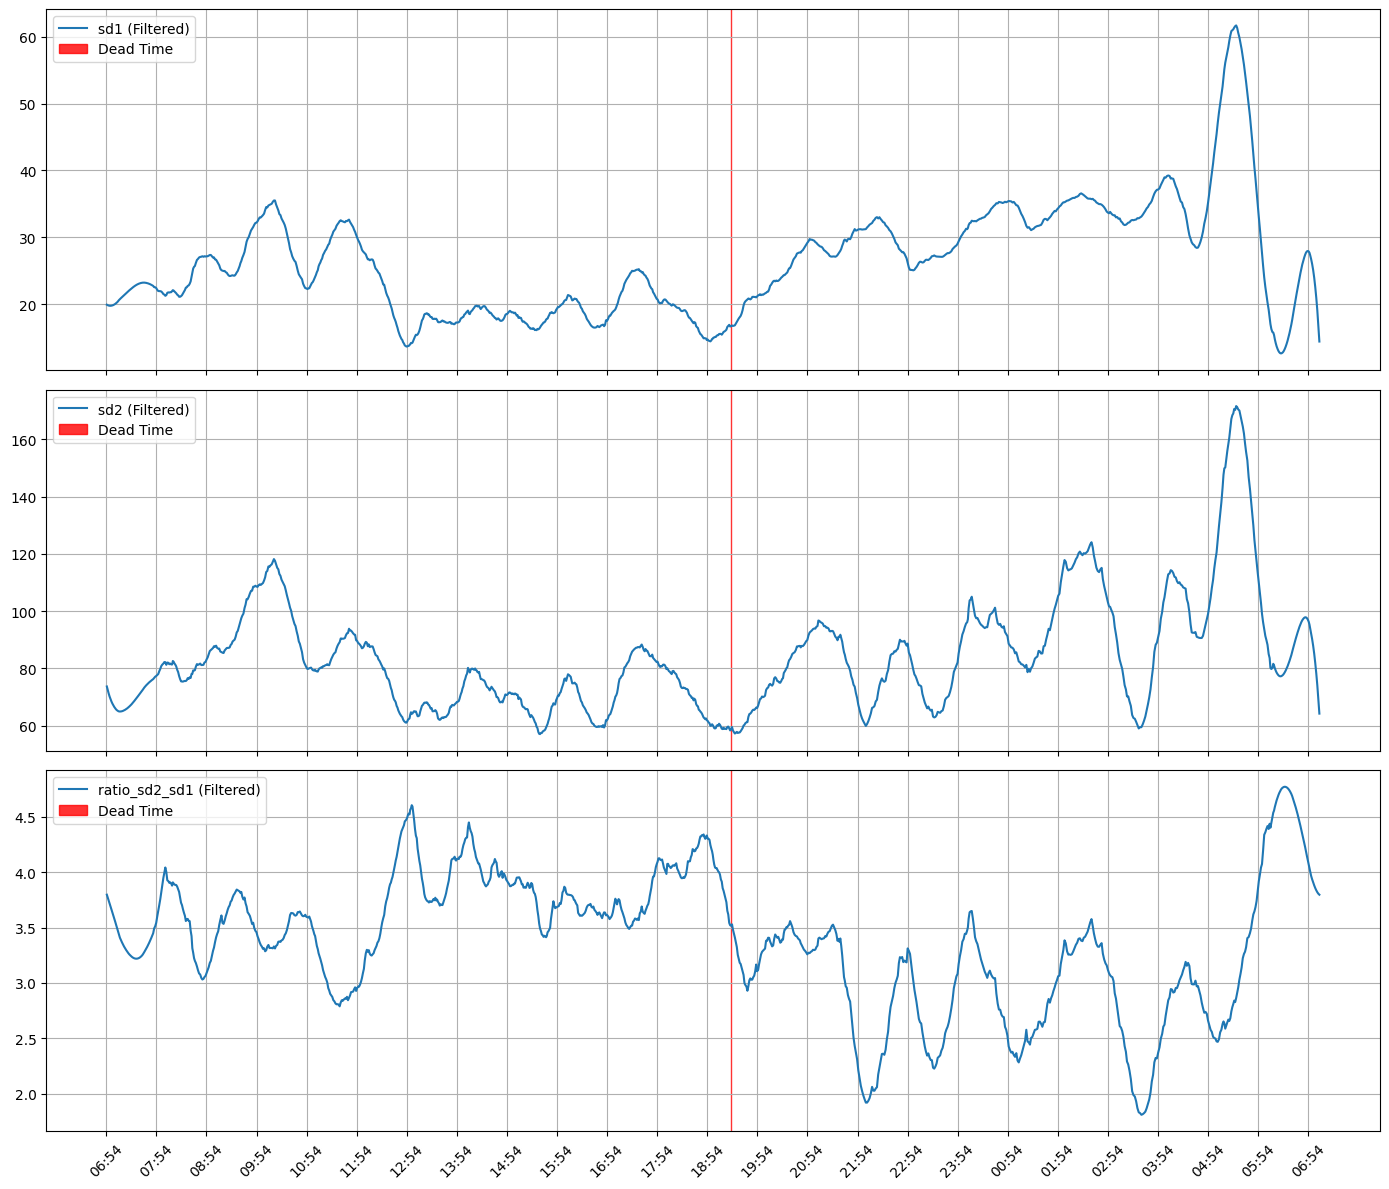

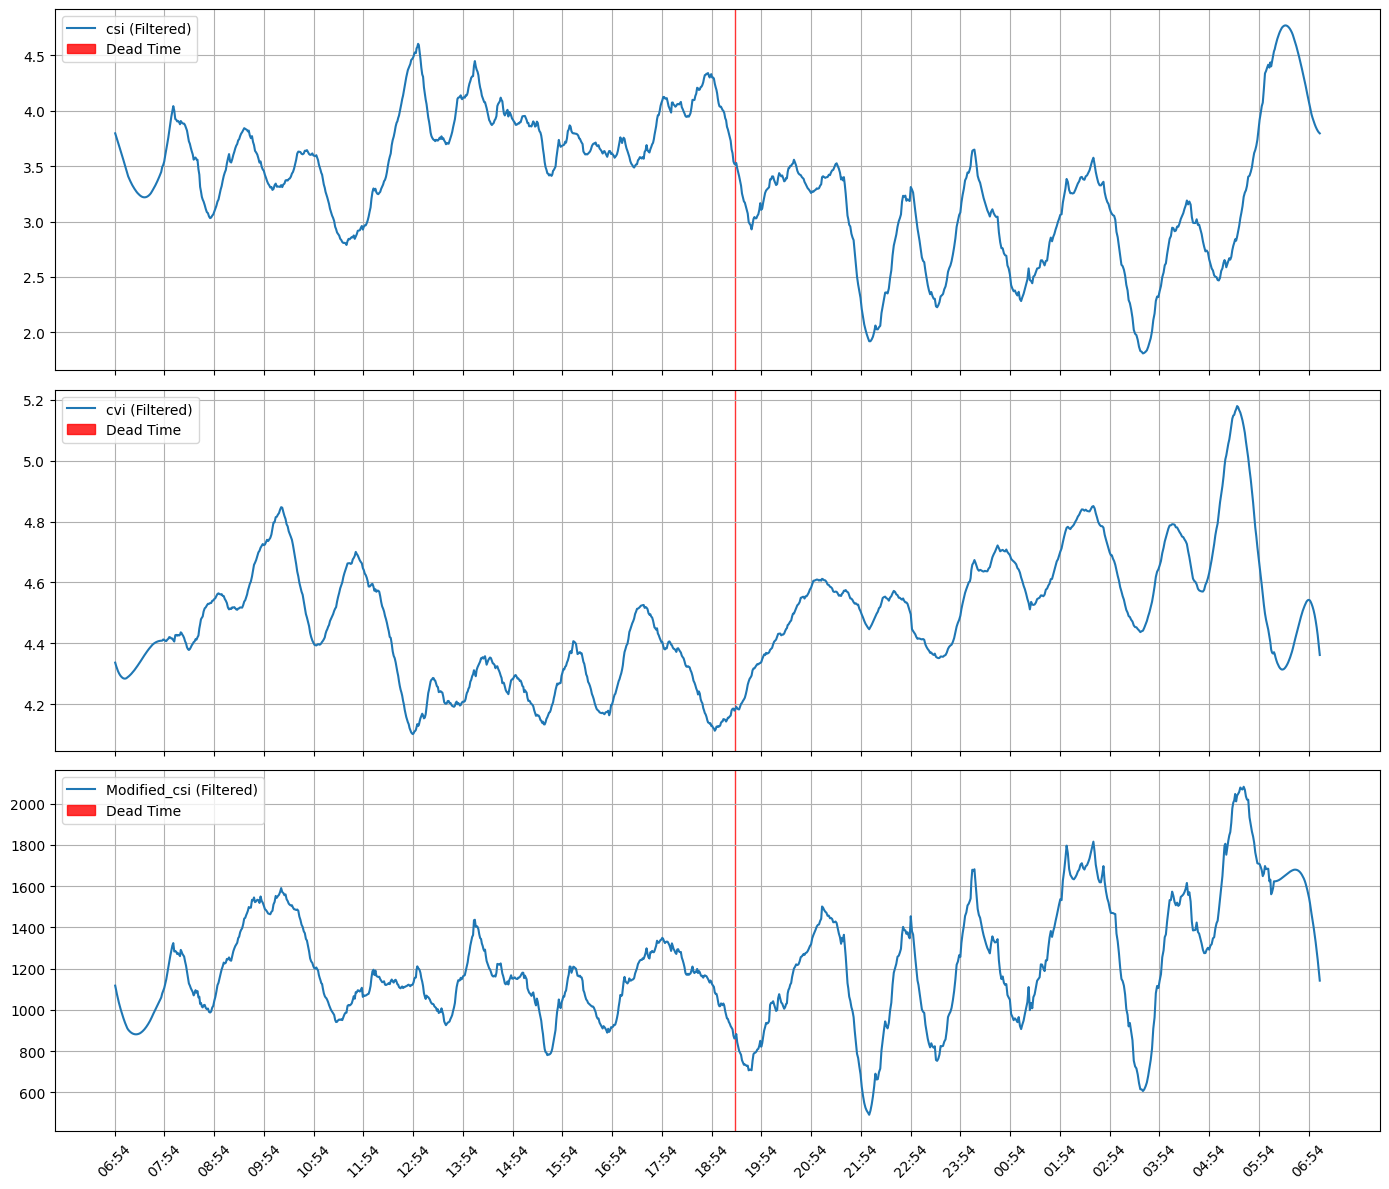

In [42]:
# ALL NONLINEAR FEATURES (CSI AND POINCARÉ)
def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))
     # Assuming 'v' is a list of NN intervals
    vlf_band = VlfBand(low=0.003, high=0.04)
    lf_band = LfBand(low=0.04, high=0.15)
    hf_band = HfBand(low=0.15, high=0.4)
    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps_ = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps_)
        nonlin_poincare_features = get_poincare_plot_features(window)

        nonlin_features = get_csi_cvi_features(window)
        results.append((window_center_time, window_mean, nonlin_poincare_features, nonlin_features))
    return results



def plot_results(time, results, feature_names, timestamps_unix, dead_time_start_timestamp, dead_time_end_timestamp, window_length, polyorder):
    fig, axes = plt.subplots(len(feature_names), 1, figsize=(14, 12), sharex=True) #6*len(feature_names)), sharex=True)

    for i, feature_name in enumerate(feature_names):
        signal = [result[feature_name] for result in results]
        filtered_signal = savgol_filter(signal, window_length=window_length, polyorder=polyorder)
        axes[i].plot(time, filtered_signal, label=f'{feature_name} (Filtered)')
        axes[i].axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')
        axes[i].legend()
        axes[i].grid(True)

    plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
    plt.tight_layout()
    plt.show()

# Set the window length and overlap percentage
window_length = 100  # Replace with your desired window length (number of data points)
overlap_percentage = 90  # Replace with your desired overlap percentage

# Perform sliding window analysis
window_results = sliding_window_analysis(df['RR-intervals'].values, df['Timestamp'].values, window_length, overlap_percentage)

# Unzip the results to get timestamps and filtered signal
window_timestamps, full_signal_with_time, nonlin_poincare_features, nonlin_features = zip(*window_results)

# Extract all frequency-domain features
poin_feature_names = list(nonlin_poincare_features[0].keys())
nonlin_feature_names = list(nonlin_features[0].keys())
print(poin_feature_names)
# Plot the results for all frequency-domain features
plot_results(window_timestamps, nonlin_poincare_features, poin_feature_names, timestamps_unix, dead_time_start_timestamp, dead_time_end_timestamp, window_length=100, polyorder=4)
plot_results(window_timestamps, nonlin_features, nonlin_feature_names, timestamps_unix, dead_time_start_timestamp, dead_time_end_timestamp,  window_length=100, polyorder=4)


C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 243, using nperseg = 243
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 205, using nperseg = 205
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  warnings.warn('nperseg = {0:d} is greater than inp

107509
1194
1194
1194


C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 234, using nperseg = 234
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Sport_Lab\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 230, using nperseg = 230
  warnings.warn('nperseg = {0:d} is greater than input length '


window_timestamps  full_signal_with_time  freq_domain_feature
0       1.707285e+09                 728.64             7.945919
1       1.707285e+09                 732.96             4.873450
2       1.707285e+09                 719.00             4.700622
3       1.707286e+09                 742.40             4.589309
4       1.707286e+09                 752.40             1.793780

timestamps_unix
0     1.707285e+09
1     1.707285e+09
2     1.707285e+09
3     1.707285e+09
4     1.707285e+09

<Figure size 1000x1000 with 0 Axes>

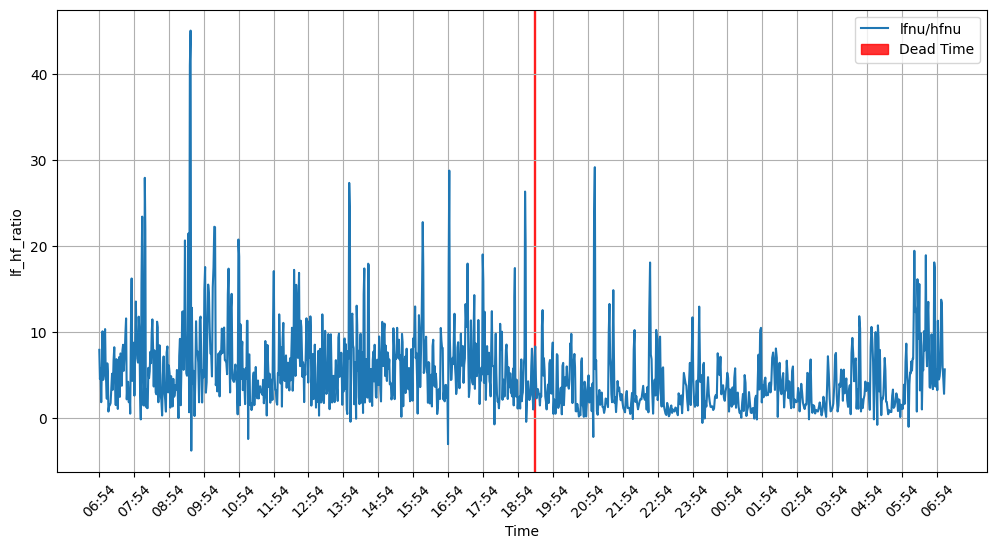

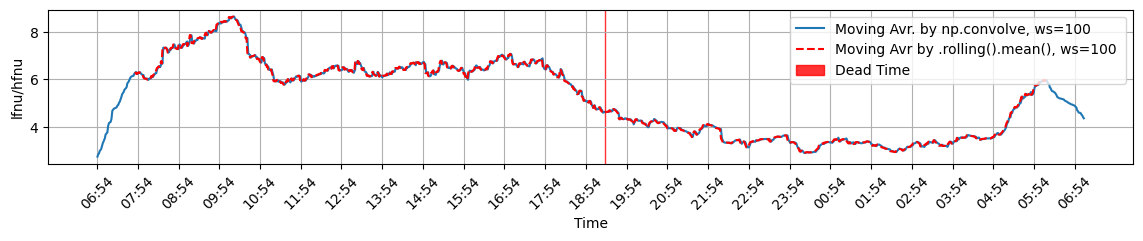

In [43]:
# Define sliding window analysis function
def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))
    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps_ = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps_)
        window_features = get_frequency_domain_features(window)
        results.append((window_center_time, window_mean, (window_features['lfnu'] / window_features['hfnu'])))
    return results

# Set the window length and overlap percentage
window_length = 100  # Replace with your desired window length (number of data points)
overlap_percentage = 90  # Replace with your desired overlap percentage

# Perform sliding window analysis
window_results = sliding_window_analysis(df['RR-intervals'].values, df['Timestamp'].values, window_length, overlap_percentage)

# Unzip the results to get timestamps and filtered signal
window_timestamps, full_signal_with_time, freq_domain_feature = zip(*window_results)
print(len(df))
print(len(window_timestamps))
print(len(full_signal_with_time))
print(len(freq_domain_feature))

# Add the values as new columns to the df DataFrame
result_df = pd.DataFrame()
result_df['window_timestamps'] = window_timestamps
result_df['full_signal_with_time'] = full_signal_with_time
result_df['freq_domain_feature'] = freq_domain_feature
display(result_df.head())

time_df = pd.DataFrame()
time_df['timestamps_unix'] = timestamps_unix
display(time_df.head())
#print(freq_domain_feature)
# Plot RR intervals
plt.figure(figsize=(10, 10))

freq_domain_filtered = savgol_filter(freq_domain_feature, window_length=10, polyorder=8)

#upper_envelope = savgol_filter(freq_domain_filtered, window_length, polyorder=4) + savgol_filter(freq_domain_filtered, window_length, polyorder=4)

plt.figure(figsize=(12, 6))
plt.plot(window_timestamps, freq_domain_filtered, label='lfnu/hfnu')
# Plot the filled gap
plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')
#plt.plot(time_in_hours, lower_envelope, 'r--', label='Lower Envelope')
#plt.fill_between(time_in_hours, lower_envelope, upper_envelope, color='gray', alpha=0.3)
plt.xlabel("Time")
plt.ylabel('lf_hf_ratio')
plt.legend()
plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
plt.grid(True)


# Window size for convolve
window_size = 100
# Moving average using numpy.convolve
y_smoothed = np.convolve(freq_domain_feature, np.ones(window_size)/window_size, mode='same')
#y_smoothed_filt = np.convolve(freq_domain_filtered, np.ones(window_size)/window_size, mode='same')

# Window size for .rolling().mean()
windowsize=100
rolling_result = result_df['freq_domain_feature'].rolling(window=windowsize).mean().shift(int(-windowsize / 2))
# Create a new DataFrame to store the result
rolling_df = pd.DataFrame({'roll_upper_envelope': rolling_result})

plt.figure(figsize=(14, 2))
plt.plot(window_timestamps, y_smoothed, label='Moving Avr. by np.convolve, ws=100')
plt.plot(window_timestamps, rolling_df['roll_upper_envelope'], 'r--', label='Moving Avr by .rolling().mean(), ws=100 ')

#plt.plot(window_timestamps, y_smoothed_filt, label='lfnu/hfnu SAVGOL FILTERED')
# Plot the filled gap
plt.axvspan(dead_time_start_timestamp, dead_time_end_timestamp, color='red', alpha=0.8, label='Dead Time')
plt.xlabel("Time")
plt.ylabel('lfnu/hfnu')
plt.legend()
plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 3600), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M')))
plt.grid(True)

plt.show()

In [46]:
time_features = get_time_domain_features((full_signal_cleaned))
time_features


{'mean_nni': 811.7933218440803,
 'sdnn': 142.95187073476018,
 'sdsd': 39.113325016085604,
 'nni_50': 15218,
 'pnni_50': 14.15522565762548,
 'nni_20': 49577,
 'pnni_20': 46.11470774267961,
 'rmssd': 39.11332503420666,
 'median_nni': 784.0,
 'range_nni': 696.0,
 'cvsd': 0.04818138309558438,
 'cvnni': 0.17609392303207033,
 'mean_hr': 76.22794744892273,
 'max_hr': 119.04761904761905,
 'min_hr': 50.0,
 'std_hr': 13.428809788145747}

In [47]:
ml_df = pd.DataFrame()
ml_df['timestamps'] = timestamps

display(ml_df.head())
print(ml_df.shape)
ml_df.info()

timestamps
0 2024-02-07 06:54:32.704
1 2024-02-07 06:54:33.424
2 2024-02-07 06:54:34.120
3 2024-02-07 06:54:34.832
4 2024-02-07 06:54:35.560

(107509, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107509 entries, 0 to 107508
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   timestamps  107509 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 840.0 KB


In [48]:

# Convert the 'timestamps' column to datetime if it's not already
#ml_df['timestamps'] = pd.to_datetime(ml_df['timestamps'])

# Set the 'timestamps' column as the index of the DataFrame
#ml_df.set_index('timestamps', inplace=True)
# Resample the DataFrame to a 15-minute frequency and select the first value in each interval
ml_df_resampled = ml_df.resample('15min') #, on='timestamps').first()

# Drop any rows with missing values (if any)
ml_df_resampled = ml_df_resampled

# Reset the index of the resampled DataFrame
#ml_df_resampled = ml_df_resampled.reset_index(drop=True)

# Display the resampled DataFrame
display(ml_df_resampled)
print(ml_df_resampled)


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [49]:
# List to store lf/hf ratio values
lf_hf_ratios = []

# Iterate over each dictionary entry in freq_d_features
for entry in freq_d_features:
    lf_hf_ratio = entry.get('lf_hf_ratio')  # Extract lf/hf ratio value from dictionary
    lf_hf_ratios.append(lf_hf_ratio)  # Append lf/hf ratio value to list

# Create a DataFrame from the list of lf/hf ratio values
ratio = pd.DataFrame({'lf_hf_ratio': lf_hf_ratios})
display(ratio.head())
print(ratio.shape)

lf_hf_ratio
0     7.945919
1     4.873450
2     4.700622
3     4.589309
4     1.793780

(1194, 1)


In [50]:
display(df.head())
df.to_csv('signal_data.csv')

Timestamp  RR-intervals
0  1.707285e+09         704.0
1  1.707285e+09         720.0
2  1.707285e+09         696.0
3  1.707285e+09         712.0
4  1.707285e+09         728.0

In [55]:
def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))
    # Assuming 'v' is a list of NN intervals
    vlf_band = VlfBand(low=0.003, high=0.04)
    lf_band = LfBand(low=0.04, high=0.15)
    hf_band = HfBand(low=0.15, high=0.4)
    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps_ = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps_)
        window_features = get_frequency_domain_features(window, vlf_band=vlf_band, lf_band=lf_band, hf_band=hf_band)
        results.append((window_center_time, window_mean, window_features))
    return results
# Define the desired window length in seconds (15 minutes)
desired_window_length_minutes = 16.8
desired_window_length_seconds = desired_window_length_minutes * 60  # Convert minutes to seconds

# Calculate the number of data points equivalent to the desired window length
num_data_points_in_15_minutes = int(sample_rate_estimate * desired_window_length_seconds)

# Use this value as the window length for your sliding window analysis
window_length = num_data_points_in_15_minutes

results = sliding_window_analysis(df['RR-intervals'].values, df['Timestamp'].values, window_length, overlap_percentage=90)
window, w_mean, lf_hf_feature = zip(*results)

lf_hf_ratios = []

for entry in lf_hf_feature:
        lf_hf_ratio = entry.get('lf_hf_ratio')  # Extract lf/hf ratio value from dictionary
        lf_hf_ratios.append(lf_hf_ratio)
# Create a DataFrame from the list of lf/hf ratio values
ratio = pd.DataFrame({'lf_hf_ratio': lf_hf_ratios})
display(ratio.head())
print(ratio.shape)


lf_hf_ratio
0     5.235144
1     2.849164
2     3.544543
3     5.918510
4     5.998482

(96, 1)


In [58]:
import pandas as pd

# Replace 'file_path.xlsx' with the path to your Excel file
#file_path = "C:\Users\Dominik\Documents\PPKE ITK\Sport Lab\stress_feedback.xlsx"

# Read the Excel file
feedback_df = pd.read_excel(r'C:\Users\Dominik\Documents\PPKE ITK\Sport Lab\stress_feedback.xlsx')

# Select the third column (indexing starts from 0)
third_column_values = feedback_df.iloc[:, 2]

# Create a DataFrame with the third column values
pos_stress_df = pd.DataFrame({'Positive stress': third_column_values})

# Display the DataFrame
print(pos_stress_df)

    Positive stress
0                 5
1                 1
2                 2
3                 2
4                 3
..              ...
58                0
59                0
60                0
61                2
62                1

[63 rows x 1 columns]


In [60]:
# Define a function to reclassify stress levels
def classify_stress(value):
    if value <= 2:
        return 0  # No stress or low stress
    else:
        return 1  # High stress

# Apply the function to reclassify stress levels
pos_stress_df['Stress level'] = pos_stress_df['Positive stress'].apply(classify_stress)
display(pos_stress_df)

Positive stress  Stress level
0                 5             1
1                 1             0
2                 2             0
3                 2             0
4                 3             1
..              ...           ...
58                0             0
59                0             0
60                0             0
61                2             0
62                1             0

[63 rows x 2 columns]

In [61]:
# Read the Excel file into a DataFrame
time = feedback_df.iloc[:, 0]

# Create a DataFrame with the third column values
pos_stress_df['Timestamp'] = time

# Convert the 'Timestamp' column to datetime format
pos_stress_df['Timestamp'] = pd.to_datetime(pos_stress_df['Timestamp'])

# Find the last timestamp and the time interval between the last two timestamps
before_gap_timestamp = pos_stress_df.iloc[57]['Timestamp']
after_gap_timestamp = pos_stress_df.iloc[58]['Timestamp']
display(before_gap_timestamp)
display(after_gap_timestamp)


Timestamp('2024-02-07 21:32:11.234000')

Timestamp('2024-02-08 06:15:05.233000')

In [62]:

time_interval = pd.Timedelta(minutes=15)

# Generate a sequence of timestamps at 15-minute intervals from the last timestamp
new_timestamps = pd.date_range(start=before_gap_timestamp + time_interval, end=after_gap_timestamp , freq='15T')

# Create a DataFrame with the new timestamps
new_df = pd.DataFrame({'Timestamp': new_timestamps})

# Concatenate the original DataFrame and the new DataFrame
c_df = pd.concat([pos_stress_df, new_df])

# Sort the DataFrame by timestamp
c_df = c_df.sort_values(by='Timestamp')

# Reset the index
c_df = c_df.reset_index(drop=True)
pd.set_option('display.max_rows', None)
# Print the updated DataFrame
display(c_df)


C:\Users\Dominik\AppData\Local\Temp\ipykernel_14820\3804069489.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_timestamps = pd.date_range(start=before_gap_timestamp + time_interval, end=after_gap_timestamp , freq='15T')


Positive stress  Stress level               Timestamp
0               5.0           1.0 2024-01-29 09:11:57.605
1               1.0           0.0 2024-02-07 07:16:04.366
2               2.0           0.0 2024-02-07 07:31:06.340
3               2.0           0.0 2024-02-07 07:46:16.200
4               3.0           1.0 2024-02-07 08:01:18.194
5               1.0           0.0 2024-02-07 08:16:59.202
6               0.0           0.0 2024-02-07 08:30:41.967
7               0.0           0.0 2024-02-07 08:45:55.245
8               1.0           0.0 2024-02-07 08:59:41.434
9               0.0           0.0 2024-02-07 09:17:51.477
10              1.0           0.0 2024-02-07 09:45:19.099
11              1.0           0.0 2024-02-07 09:46:08.448
12              1.0           0.0 2024-02-07 10:01:43.713
13              1.0           0.0 2024-02-07 10:29:33.391
14              1.0           0.0 2024-02-07 10:57:53.952
15              1.0           0.0 2024-02-07 11:03:45.808
16              1.0           0.0 2024-02-07 11:16:00.009
17              0.0           0.0 2024-02-07 11:36:07.809
18              1.0           0.0 2024-02-07 11:49:14.120
19              0.0           0.0 2024-02-07 12:02:22.549
20              2.0           0.0 2024-02-07 12:20:01.386
21              2.0           0.0 2024-02-07 12:34:51.101
22              2.0           0.0 2024-02-07 12:45:53.197
23              2.0           0.0 2024-02-07 13:06:40.150
24              2.0           0.0 2024-02-07 13:17:49.910
25              2.0           0.0 2024-02-07 13:32:21.850
26              2.0           0.0 2024-02-07 13:50:39.411
27              2.0           0.0 2024-02-07 14:01:21.893
28              3.0           1.0 2024-02-07 14:16:25.187
29              3.0           1.0 2024-02-07 14:31:14.876
30              3.0           1.0 2024-02-07 15:00:19.594
31              2.0           0.0 2024-02-07 15:01:16.568
32              0.0           0.0 2024-02-07 15:18:11.716
33              1.0           0.0 2024-02-07 15:32:44.901
34              0.0           0.0 2024-02-07 15:45:36.911
35              2.0           0.0 2024-02-07 16:01:54.994
36              2.0           0.0 2024-02-07 16:14:52.969
37              0.0           0.0 2024-02-07 16:31:02.578
38              0.0           0.0 2024-02-07 16:46:03.976
39              0.0           0.0 2024-02-07 17:00:06.613
40              1.0           0.0 2024-02-07 17:15:44.465
41              2.0           0.0 2024-02-07 17:30:53.279
42              1.0           0.0 2024-02-07 17:47:36.784
43              1.0           0.0 2024-02-07 18:04:22.525
44              1.0           0.0 2024-02-07 18:18:46.751
45              1.0           0.0 2024-02-07 18:30:37.563
46              2.0           0.0 2024-02-07 18:45:43.327
47              0.0           0.0 2024-02-07 19:02:58.754
48              2.0           0.0 2024-02-07 19:19:44.100
49              2.0           0.0 2024-02-07 19:30:21.714
50              2.0           0.0 2024-02-07 19:45:40.410
51              2.0           0.0 2024-02-07 20:03:46.672
52              1.0           0.0 2024-02-07 20:18:38.643
53              1.0           0.0 2024-02-07 20:31:18.999
54              0.0           0.0 2024-02-07 20:45:40.396
55              1.0           0.0 2024-02-07 20:59:34.223
56              2.0           0.0 2024-02-07 21:19:38.546
57              0.0           0.0 2024-02-07 21:32:11.234
58              NaN           NaN 2024-02-07 21:47:11.234
59              NaN           NaN 2024-02-07 22:02:11.234
60              NaN           NaN 2024-02-07 22:17:11.234
61              NaN           NaN 2024-02-07 22:32:11.234
62              NaN           NaN 2024-02-07 22:47:11.234
63              NaN           NaN 2024-02-07 23:02:11.234
64              NaN           NaN 2024-02-07 23:17:11.234
65              NaN           NaN 2024-02-07 23:32:11.234
66              NaN           NaN 2024-02-07 23:47:11.234
67              NaN           NaN 2024-02-08 00:02:11.234
68

In [63]:
# Assuming df is your DataFrame
c_df = c_df.drop(c_df.index[0])
# Assuming df is your DataFrame
c_df.fillna(0, inplace=True)
#pd.set_option('display.max_rows', None)

display(c_df)

Positive stress  Stress level               Timestamp
1               1.0           0.0 2024-02-07 07:16:04.366
2               2.0           0.0 2024-02-07 07:31:06.340
3               2.0           0.0 2024-02-07 07:46:16.200
4               3.0           1.0 2024-02-07 08:01:18.194
5               1.0           0.0 2024-02-07 08:16:59.202
6               0.0           0.0 2024-02-07 08:30:41.967
7               0.0           0.0 2024-02-07 08:45:55.245
8               1.0           0.0 2024-02-07 08:59:41.434
9               0.0           0.0 2024-02-07 09:17:51.477
10              1.0           0.0 2024-02-07 09:45:19.099
11              1.0           0.0 2024-02-07 09:46:08.448
12              1.0           0.0 2024-02-07 10:01:43.713
13              1.0           0.0 2024-02-07 10:29:33.391
14              1.0           0.0 2024-02-07 10:57:53.952
15              1.0           0.0 2024-02-07 11:03:45.808
16              1.0           0.0 2024-02-07 11:16:00.009
17              0.0           0.0 2024-02-07 11:36:07.809
18              1.0           0.0 2024-02-07 11:49:14.120
19              0.0           0.0 2024-02-07 12:02:22.549
20              2.0           0.0 2024-02-07 12:20:01.386
21              2.0           0.0 2024-02-07 12:34:51.101
22              2.0           0.0 2024-02-07 12:45:53.197
23              2.0           0.0 2024-02-07 13:06:40.150
24              2.0           0.0 2024-02-07 13:17:49.910
25              2.0           0.0 2024-02-07 13:32:21.850
26              2.0           0.0 2024-02-07 13:50:39.411
27              2.0           0.0 2024-02-07 14:01:21.893
28              3.0           1.0 2024-02-07 14:16:25.187
29              3.0           1.0 2024-02-07 14:31:14.876
30              3.0           1.0 2024-02-07 15:00:19.594
31              2.0           0.0 2024-02-07 15:01:16.568
32              0.0           0.0 2024-02-07 15:18:11.716
33              1.0           0.0 2024-02-07 15:32:44.901
34              0.0           0.0 2024-02-07 15:45:36.911
35              2.0           0.0 2024-02-07 16:01:54.994
36              2.0           0.0 2024-02-07 16:14:52.969
37              0.0           0.0 2024-02-07 16:31:02.578
38              0.0           0.0 2024-02-07 16:46:03.976
39              0.0           0.0 2024-02-07 17:00:06.613
40              1.0           0.0 2024-02-07 17:15:44.465
41              2.0           0.0 2024-02-07 17:30:53.279
42              1.0           0.0 2024-02-07 17:47:36.784
43              1.0           0.0 2024-02-07 18:04:22.525
44              1.0           0.0 2024-02-07 18:18:46.751
45              1.0           0.0 2024-02-07 18:30:37.563
46              2.0           0.0 2024-02-07 18:45:43.327
47              0.0           0.0 2024-02-07 19:02:58.754
48              2.0           0.0 2024-02-07 19:19:44.100
49              2.0           0.0 2024-02-07 19:30:21.714
50              2.0           0.0 2024-02-07 19:45:40.410
51              2.0           0.0 2024-02-07 20:03:46.672
52              1.0           0.0 2024-02-07 20:18:38.643
53              1.0           0.0 2024-02-07 20:31:18.999
54              0.0           0.0 2024-02-07 20:45:40.396
55              1.0           0.0 2024-02-07 20:59:34.223
56              2.0           0.0 2024-02-07 21:19:38.546
57              0.0           0.0 2024-02-07 21:32:11.234
58              0.0           0.0 2024-02-07 21:47:11.234
59              0.0           0.0 2024-02-07 22:02:11.234
60              0.0           0.0 2024-02-07 22:17:11.234
61              0.0           0.0 2024-02-07 22:32:11.234
62              0.0           0.0 2024-02-07 22:47:11.234
63              0.0           0.0 2024-02-07 23:02:11.234
64              0.0           0.0 2024-02-07 23:17:11.234
65              0.0           0.0 2024-02-07 23:32:11.234
66              0.0           0.0 2024-02-07 23:47:11.234
67              0.0           0.0 2024-02-08 00:02:11.234
68              0.0           0.0 2024-02-08 00:17:11.234
69

In [64]:
c_df.to_csv('pos_stress_completed_time.csv', index=False)


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the Data
#df = pd.read_csv("your_dataset.csv")

# Step 2: Create 15-Minute Windows and Calculate Mean lf/hf Ratio
#df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert timestamp column to datetime
#df.set_index('timestamp', inplace=True)
#df_resampled = df.resample('15T').mean()  # Resample data into 15-minute intervals and calculate mean

# Step 3: Prepare the Data
X = ratio['lf_hf_ratio'].values.reshape(-1, 1)  # Feature matrix (mean lf/hf ratio)
y = c_df['Positive stress'].values  # Target variable (stress levels)

# Step 4: Train the Linear Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 0.5454818545026658


In [66]:
# Step 3: Prepare the Data
X = ratio['lf_hf_ratio'].values.reshape(-1, 1)  # Feature matrix (mean lf/hf ratio)
y = c_df['Stress level'].values  # Target variable (stress levels)

# Step 4: Train the Linear Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0036891024759452065


In [67]:
df.shape

(107509, 2)

In [1]:
import pandas as pd

# Replace 'file_path.xlsx' with the path to your Excel file
file_path = r'C:\Users\Dominik\Documents\PPKE ITK\Sport Lab\stress_feedback.xlsx'

# Read the Excel file
feedback_df = pd.read_excel(file_path)

# Select the third column for positive stress and the fifth column for negative stress
positive_stress_values = feedback_df.iloc[:, 2]
negative_stress_values = feedback_df.iloc[:, 4]

# Create DataFrames with the stress values
pos_stress_df = pd.DataFrame({'Positive stress': positive_stress_values})
neg_stress_df = pd.DataFrame({'Negative stress': negative_stress_values})

# Define a function to reclassify stress levels
def classify_stress(value):
    if value <= 2:
        return 0  # No stress or low stress
    else:
        return 1  # High stress

# Apply the function to reclassify stress levels
pos_stress_df['Positive classified'] = pos_stress_df['Positive stress'].apply(classify_stress)
neg_stress_df['Negative classified'] = neg_stress_df['Negative stress'].apply(classify_stress)

# Combine the positive and negative stress DataFrames
final_df = pd.concat([pos_stress_df, neg_stress_df], axis=1)

# Read the time column (assuming it's the first column)
time = feedback_df.iloc[:, 0]
final_df['Timestamp'] = pd.to_datetime(time)

# Sort the DataFrame by timestamp
final_df = final_df.sort_values(by='Timestamp')

# Find the last timestamp and the time interval between the last two timestamps
before_gap_timestamp = final_df.iloc[57]['Timestamp']
after_gap_timestamp = final_df.iloc[58]['Timestamp']

# Generate a sequence of timestamps at 15-minute intervals from the last timestamp
time_interval = pd.Timedelta(minutes=15)
new_timestamps = pd.date_range(start=before_gap_timestamp + time_interval, end=after_gap_timestamp, freq='15T')

# Create a DataFrame with the new timestamps
new_df = pd.DataFrame({'Timestamp': new_timestamps})

# Concatenate the original DataFrame and the new DataFrame
final_df = pd.concat([final_df, new_df])

# Sort the DataFrame by timestamp
final_df = final_df.sort_values(by='Timestamp')

# Reset the index
final_df = final_df.reset_index(drop=True)

# Drop the first row if necessary
final_df = final_df.drop(final_df.index[0])

# Fill NaN values with 0
final_df.fillna(0, inplace=True)

# Display the final DataFrame
pd.set_option('display.max_rows', None)
display(final_df)

# Save the final DataFrame to a CSV file
final_df.to_csv('final_stress_data.csv', index=False)


C:\Users\Dominik\AppData\Local\Temp\ipykernel_20520\2954591370.py:44: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_timestamps = pd.date_range(start=before_gap_timestamp + time_interval, end=after_gap_timestamp, freq='15T')


Positive stress  Positive classified  Negative stress  \
1               1.0                  0.0              1.0   
2               2.0                  0.0              0.0   
3               2.0                  0.0              0.0   
4               3.0                  1.0              0.0   
5               1.0                  0.0              1.0   
6               0.0                  0.0              0.0   
7               0.0                  0.0              0.0   
8               1.0                  0.0              0.0   
9               0.0                  0.0              0.0   
10              1.0                  0.0              0.0   
11              1.0                  0.0              0.0   
12              1.0                  0.0              0.0   
13              1.0                  0.0              0.0   
14              1.0                  0.0              0.0   
15              1.0                  0.0              0.0   
16              1.0                  0.0              0.0   
17              0.0                  0.0              1.0   
18              1.0                  0.0              0.0   
19              0.0                  0.0              1.0   
20              2.0                  0.0              0.0   
21              2.0                  0.0              0.0   
22              2.0                  0.0              0.0   
23              2.0                  0.0              0.0   
24              2.0                  0.0              0.0   
25              2.0                  0.0              0.0   
26              2.0                  0.0              0.0   
27              2.0                  0.0              1.0   
28              3.0                  1.0              0.0   
29              3.0                  1.0              0.0   
30              3.0                  1.0              0.0   
31              2.0                  0.0              0.0   
32              0.0                  0.0              0.0   
33              1.0                  0.0              0.0   
34              0.0                  0.0              0.0   
35              2.0                  0.0              0.0   
36              2.0                  0.0              0.0   
37              0.0                  0.0              0.0   
38              0.0                  0.0              0.0   
39              0.0                  0.0              0.0   
40              1.0                  0.0              0.0   
41              2.0                  0.0              0.0   
42              1.0                  0.0              0.0   
43              1.0                  0.0              0.0   
44              1.0                  0.0              0.0   
45              1.0                  0.0              0.0   
46              2.0                  0.0              0.0   
47              0.0                  0.0              0.0   
48              2.0                  0.0              0.0   
49              2.0                  0.0              0.0   
50              2.0                  0.0              0.0   
51              2.0                  0.0              0.0   
52              1.0                  0.0              1.0   
53              1.0                  0.0              0.0   
54              0.0                  0.0              0.0   
55              1.0                  0.0              0.0   
56              2.0                  0.0              0.0   
57              0.0                  0.0              0.0   
58              0.0                  0.0              0.0   
59              0.0                  0.0              0.0   
60              0.0                  0.0              0.0   
61              0.0                  0.0              0.0   
62              0.0                  0.0              0.0   
63              0.0                  0.0              0.0   
64              0.0                  0.0              0.0   
65              0.0                  0.

In [6]:
pd.set_option('display.max_rows', None)
print(final_df)

    Positive stress  Positive classified  Negative stress  \
1               1.0                  0.0              1.0   
2               2.0                  0.0              0.0   
3               2.0                  0.0              0.0   
4               3.0                  1.0              0.0   
5               1.0                  0.0              1.0   
6               0.0                  0.0              0.0   
7               0.0                  0.0              0.0   
8               1.0                  0.0              0.0   
9               0.0                  0.0              0.0   
10              1.0                  0.0              0.0   
11              1.0                  0.0              0.0   
12              1.0                  0.0              0.0   
13              1.0                  0.0              0.0   
14              1.0                  0.0              0.0   
15              1.0                  0.0              0.0   
16              1.0     

In [8]:
final_df.to_csv('stress_feedback_with_classified.csv', index=False)